# Import needed libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned data

In [3]:
# Load cleaned data from CSV file
nonResDataWtOut = pd.read_csv("building-energy-benchmarking.csv")

# Modeling

## Prediction of Total GHGEmissions (MetricTonsCO2e)

In [4]:
# Predict 'GHGEmissions(MetricTonsCO2e)' (equivalent to 'TotalGHGEmissions')
import timeit
from sklearn.metrics import r2_score
from sklearn import preprocessing

simplifiedDf_dum = nonResDataWtOut[['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood',
                            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
                             'GHGEmissions(MetricTonsCO2e)']]
# Perform one hot encoding of categorical features/variables
dummyDf = pd.get_dummies(simplifiedDf_dum, columns=['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood'])


print(dummyDf.shape)
for col in dummyDf.columns:
    if dummyDf[col].isnull().mean()*100 > 3:
        print(col)
        print("NA rate: ", dummyDf[col].isnull().mean()*100)
dummyDf_na = dummyDf.dropna(how='any')
print("Dataframe with the dependant variable:")
print(dummyDf_na.shape)
display(dummyDf_na.head())

print("Dataframe without the dependant variable:")
display(dummyDf_na.loc[:, dummyDf_na.columns != 'GHGEmissions(MetricTonsCO2e)'].head())

X = dummyDf_na.loc[:, dummyDf_na.columns != 'GHGEmissions(MetricTonsCO2e)'].values
y = dummyDf_na['GHGEmissions(MetricTonsCO2e)'].values

print("y min and max values: ", y.min(), y.max())
y_range_emissions = y.max()-y.min()
print("Range of y values: ", y_range_emissions)
print("X min and max values: ", X.min(), X.max())

from sklearn import model_selection
# Split train and test datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                test_size=0.3, random_state=0)

# Standardize features
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

print("X_train_std min and max values: ", X_train_std.min(), X_train_std.max())
print("X_test_std min and max values: ", X_test_std.min(), X_test_std.max())


(1674, 61)
LargestPropertyUseTypeGFA
NA rate:  3.942652329749104
Dataframe with the dependant variable:
(1601, 61)


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GHGEmissions(MetricTonsCO2e),PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,249.43,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,263.51,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,2061.48,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1936.34,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,507.70,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Dataframe without the dependant variable:


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


y min and max values:  0.0 16870.98
Range of y values:  16870.98
X min and max values:  -50550.0 9320156.0
X_train_std min and max values:  -2.582872988885145 33.45145736735538
X_test_std min and max values:  -2.582872988885145 57.07058705549905


In [5]:
from sklearn import dummy, linear_model, metrics

# Random model
start_time = timeit.default_timer()
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)
elapsed = timeit.default_timer() - start_time
print("RMSE of random prediction model: {:.2f} time {:.4f}s"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred_random) ), elapsed))
print("R2 score of random prediction model : {:.2f}".format(r2_score(y_test, y_pred_random)))
# perfDict.update( {'Random model':[np.sqrt( metrics.mean_squared_error(y_test, y_pred_random)), r2_score(y_test, y_pred_random), elapsed]} )

# Dummy mean regressor
dum = dummy.DummyRegressor(strategy='mean')
start_time = timeit.default_timer()
# Train
dum.fit(X_train_std, y_train)
# Predict
y_pred_dum = dum.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
# Evaluate
print("RMSE of mean dummy regressor training set: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, dum.predict(X_train_std)))))
print("RMSE of mean dummy regressor test set: {:.2f} time {:.4f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)), elapsed ))
print("RMSE of mean dummy regressor normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum))/y_range_emissions))
print("R2 score of mean dummy regressor : {:.2f}".format(r2_score(y_test, y_pred_dum)))
perfDict = { 'Mean dummy model': [np.sqrt( metrics.mean_squared_error(y_test, y_pred_dum)), r2_score(y_test, y_pred_dum), elapsed] }

# Linear regression model
lr = linear_model.LinearRegression()
start_time = timeit.default_timer()
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("RMSE of linear regression model training set: {:.2f}"
      .format(np.sqrt( metrics.mean_squared_error(y_train, lr.predict(X_train_std)) )))
print("RMSE of linear regression model test set: {:.2f} time {:.2f}s"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) ), elapsed))
print("RMSE of linear regression model test set normalized: {:.2f}"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )/y_range_emissions))
print("R2 score of linear regression model : {:.2f}".format(lr.score(X_test_std, y_test)))
perfDict.update( {'Linear reg':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), lr.score(X_test_std, y_test), elapsed]} )


RMSE of random prediction model: 9685.96 time 0.0024s
R2 score of random prediction model : -173.99
RMSE of mean dummy regressor training set: 762.89
RMSE of mean dummy regressor test set: 732.42 time 0.0004s
RMSE of mean dummy regressor normalized: 0.04
R2 score of mean dummy regressor : -0.00
RMSE of linear regression model training set: 538.89
RMSE of linear regression model test set: 805.71 time 0.14s
RMSE of linear regression model test set normalized: 0.05
R2 score of linear regression model : -0.21


In [6]:
# params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

print("Linear regression params: \n", linear_model.LinearRegression().get_params())
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

# Choose a score to optimize, here mean squared error
score = 'neg_mean_squared_error'
clf = model_selection.GridSearchCV(
    linear_model.LinearRegression(),
    params,
    cv=5,          # nb of folds of cross validation
    scoring=score
)

start_time = timeit.default_timer()
clf.fit(X_train_std, y_train)

print("\nBest hyperparameters on training set:")
print(clf.best_params_)

# Display corresponding performances
print("\nCross validation results :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],
        clf.cv_results_['std_test_score'],
        clf.cv_results_['params']
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )
    
y_pred = clf.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of linear regression with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, clf.predict(X_train_std)))))
print("\nRMSE of linear regression with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of linear regression with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of linear regression with GridSearchCV : {:.2f}".format(r2_score(y_test, y_pred)))
perfDict.update( {'LinearReg-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )

Linear regression params: 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Best hyperparameters on training set:
{'copy_X': True, 'fit_intercept': True, 'normalize': False}

Cross validation results :
neg_mean_squared_error = -157392802161997844748413145458618782209791363475249466322190336.000 (+/-629571208647991378993652581834475128839165453900997865288761344.000) for {'copy_X': True, 'fit_intercept': True, 'normalize': True}
neg_mean_squared_error = -471280338255362117924290560.000 (+/-1549281005369516674605121536.000) for {'copy_X': True, 'fit_intercept': True, 'normalize': False}
neg_mean_squared_error = -2935297489021816394347446272.000 (+/-11741189956087265577389785088.000) for {'copy_X': True, 'fit_intercept': False, 'normalize': True}
neg_mean_squared_error = -2935297489021816394347446272.000 (+/-11741189956087265577389785088.000) for {'copy_X': True, 'fit_intercept': False, 'normalize': False}
neg_mean_squared_error = -1573928021619978447484131454

In [7]:
# Ridge CV   

from sklearn.linear_model import RidgeCV
print("RidgeCV params: \n", RidgeCV().get_params())

score = 'neg_mean_squared_error'
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
# cv=None, to use the efficient Leave-One-Out cross-validation, incompatible with store_cv_values=True
start_time = timeit.default_timer()
clf = RidgeCV(alphas=alphas, scoring=score, store_cv_values=True).fit(X_train_std, y_train)

alpha = clf.alpha_
print("\nalpha: {:.2f}".format(alpha))

y_pred = clf.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of RidgeCV (training set): {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_train, clf.predict(X_train_std)))))
print("\nRMSE of RidgeCV (test set): {:.2f} time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of RidgeCV (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of RidgeCV : {:.2f}".format(clf.score(X_test_std, y_test)))
perfDict.update( {'RidgeCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), clf.score(X_test_std, y_test), elapsed]} )

RidgeCV params: 
 {'alphas': array([ 0.1,  1. , 10. ]), 'cv': None, 'fit_intercept': True, 'gcv_mode': None, 'normalize': False, 'scoring': None, 'store_cv_values': False}

alpha: 3.78

RMSE of RidgeCV (training set): 539.47

RMSE of RidgeCV (test set): 758.48 time 0.10s

RMSE of RidgeCV (test set) normalized: 0.04
R2 score of RidgeCV : -0.07


In [8]:
# Lasso CV

from sklearn.linear_model import LassoCV
# score = 'neg_mean_squared_error'
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
# cv=None, to use the default 5-fold cross-validation
start_time = timeit.default_timer()
clf = LassoCV(alphas=alphas, tol=1e-1, random_state=0).fit(X_train_std, y_train)

alpha = clf.alpha_
print("\nalpha: {}".format(alpha))

y_pred = clf.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of LassoCV (training set): {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_train, clf.predict(X_train_std)))))
print("\nRMSE of LassoCV (test set): {:.2f} time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of LassoCV (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of LassoCV : {:.2f}".format(clf.score(X_test_std, y_test)))
perfDict.update( {'LassoCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), clf.score(X_test_std, y_test), elapsed]} )



alpha: 1e-05

RMSE of LassoCV (training set): 538.89

RMSE of LassoCV (test set): 805.81 time 0.18s

RMSE of LassoCV (test set) normalized: 0.05
R2 score of LassoCV : -0.21


In [9]:
# ElasticNet CV

from sklearn.linear_model import ElasticNetCV

# cv=None, to use the default 5-fold cross-validation
# l1_ratio does not change anything
start_time = timeit.default_timer()
reg = ElasticNetCV(alphas=alphas, random_state=0, tol=1e-2).fit(X_train_std, y_train)

alpha = reg.alpha_
print("\nalpha: {:.2f}".format(alpha))

y_pred = reg.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of ElasticNetCV (training set): {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_train, reg.predict(X_train_std)))))
print("\nRMSE of ElasticNetCV (test set): {:.2f} time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of ElasticNetCV (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of ElasticNetCV : {:.2f}".format(reg.score(X_test_std, y_test)))
perfDict.update( {'ElasticNetCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), reg.score(X_test_std, y_test), elapsed]} )



alpha: 0.02

RMSE of ElasticNetCV (training set): 542.00

RMSE of ElasticNetCV (test set): 696.38 time 0.41s

RMSE of ElasticNetCV (test set) normalized: 0.04
R2 score of ElasticNetCV : 0.10


In [10]:
# Linear SVR

from sklearn.svm import LinearSVR

# Or Without the two last parameters; default: dual=True, loss='epsilon_insensitive'
# random_state=0; to have the same output
lsvr = LinearSVR(random_state=0, tol=1e-5, dual=False, loss='squared_epsilon_insensitive')
start_time = timeit.default_timer()
lsvr.fit(X_train_std, y_train)

y_pred = lsvr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of Linear SVR (training set): {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_train, lsvr.predict(X_train_std)))))
print("\nRMSE of Linear SVR (test set): {:.2f} time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of Linear SVR (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of Linear SVR : {:.2f}".format(lsvr.score(X_test_std, y_test)))
perfDict.update( {'Linear SVR':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), lsvr.score(X_test_std, y_test), elapsed]} )

# Cross validation
# C is the regularization parameter:
# The strength of the regularization is inversely proportional to C
# Must be strictly positive. The penalty is a squared l2 penalty.
params = { 'C': np.logspace(-6, 3, 30) }
gs_svr = model_selection.GridSearchCV(lsvr, params, cv=10)
print("LSVR params: \n", lsvr.get_params())

start_time = timeit.default_timer()
gs_svr.fit(X_train_std, y_train)

print(gs_svr.best_params_)

y_pred = gs_svr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of Linear SVR with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, gs_svr.predict(X_train_std)))))
print("\nRMSE of Linear SVR with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of Linear SVR with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of Linear SVR with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDict.update( {'Linear SVR-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )



RMSE of Linear SVR (training set): 538.91

RMSE of Linear SVR (test set): 798.51 time 0.01s

RMSE of Linear SVR (test set) normalized: 0.05
R2 score of Linear SVR : -0.19
LSVR params: 
 {'C': 1.0, 'dual': False, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 1.0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000, 'random_state': 0, 'tol': 1e-05, 'verbose': 0}
{'C': 0.0003039195382313198}

RMSE of Linear SVR with GridSearchCV (training set): 627.57

RMSE of Linear SVR with GridSearchCV (test set): 393.76 time 1.99s

RMSE of Linear SVR with GridSearchCV (test set) normalized: 0.02
R2 score of Linear SVR with GridSearchCV: 0.71


In [11]:
# Kernel SVR

from sklearn.svm import SVR

regSvr = SVR() # kernel default = rbf (gaussian), C=1.0, epsilon=1/(n_features * X.var())
start_time = timeit.default_timer()
regSvr.fit(X_train_std, y_train)

y_pred = regSvr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of SVR (training set): {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_train, regSvr.predict(X_train_std)))))
print("\nRMSE of SVR (test set): {:.2f} time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of SVR (test set): {:.2f} normalized".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of SVR: {:.2f}".format(regSvr.score(X_test_std, y_test)))
perfDict.update( {'SVR':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), regSvr.score(X_test_std, y_test), elapsed]} )

# Cross validation
# Gamma controls the kernel gaussian bandwidth (rbf)
params = { 'C': np.logspace(0, 4, 10), 'gamma': np.logspace(-2, 0, 4) }
gs_svr = model_selection.GridSearchCV(regSvr, params, cv=5)
print("SVR params: \n", regSvr.get_params())

start_time = timeit.default_timer()
gs_svr.fit(X_train_std, y_train)

print("\n", gs_svr.best_params_)

y_pred = gs_svr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of SVR with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, gs_svr.predict(X_train_std)))))
print("\nRMSE of SVR with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of SVR with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of SVR with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDict.update( {'SVR-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )



RMSE of SVR (training set): 770.69

RMSE of SVR (test set): 743.42 time 0.15s

RMSE of SVR (test set): 0.04 normalized
R2 score of SVR: -0.03
SVR params: 
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

 {'C': 10000.0, 'gamma': 0.01}

RMSE of SVR with GridSearchCV (training set): 363.54

RMSE of SVR with GridSearchCV (test set): 539.30 time 25.27s

RMSE of SVR with GridSearchCV (test set) normalized: 0.03
R2 score of SVR with GridSearchCV: 0.46


In [12]:
# Kernel Ridge

from sklearn import kernel_ridge

kr = kernel_ridge.KernelRidge(kernel='rbf')
start_time = timeit.default_timer()                                     
kr.fit(X_train_std, y_train)

y_pred = kr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of Kernel Ridge (training set): {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_train, kr.predict(X_train_std)))))
print("\nRMSE of Kernel Ridge (test set): {:.2f} time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of Kernel Ridge (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of Kernel Ridge: {:.2f}".format(kr.score(X_test_std, y_test)))
perfDict.update( {'Kernel Ridge':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), kr.score(X_test_std, y_test), elapsed]} )

# Cross validation 
alpha_range = np.logspace(-4, 2, 5)
gamma_range = np.logspace(-4, 1, 4)

param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score for optimal model selection
score = 'neg_mean_squared_error'

grid_pred = model_selection.GridSearchCV(kr, param_grid, cv=5, scoring=score)

print("Kernel ridge params: \n", kr.get_params())

start_time = timeit.default_timer()                                     
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of Kernel Ridge with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))))
print("\nRMSE of Kernel Ridge with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of Kernel Ridge with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of Kernel Ridge with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDict.update( {'Kernel Ridge-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )



RMSE of Kernel Ridge (training set): 380.09

RMSE of Kernel Ridge (test set): 631.68 time 0.07s

RMSE of Kernel Ridge (test set) normalized: 0.04
R2 score of Kernel Ridge: 0.26
Kernel ridge params: 
 {'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma': None, 'kernel': 'rbf', 'kernel_params': None}

 {'alpha': 0.0031622776601683794, 'gamma': 0.004641588833612782}

RMSE of Kernel Ridge with GridSearchCV (training set): 102.22

RMSE of Kernel Ridge with GridSearchCV (test set): 568.45 time 4.83s

RMSE of Kernel Ridge with GridSearchCV (test set) normalized: 0.03
R2 score of Kernel Ridge with GridSearchCV: 0.40


In [13]:
# MLPRegressor
from sklearn.neural_network import MLPRegressor

# 'activation': 'relu'
# hidden_layer_sizes=(100,)
start_time = timeit.default_timer()                                     
mlpr = MLPRegressor(random_state=0, tol=1e-2, max_iter=500, learning_rate_init=0.1).fit(X_train_std, y_train)
print("MLP regressor params: \n", mlpr.get_params())

print("Number of layers: ", mlpr.n_layers_)
y_pred = mlpr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of MLPRegressor (training set): {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_train, mlpr.predict(X_train_std)))))
print("\nRMSE of MLPRegressor (test set): {:.2f} time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of MLPRegressor (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of MLPRegressor: {:.2f}".format(mlpr.score(X_test_std, y_test)))
perfDict.update( {'MLPRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), mlpr.score(X_test_std, y_test), elapsed]} )

# Cross validation
# 'warm_start': [False, True] =>False
# 'hidden_layer_sizes': [
#              (1,),(2,),(10,),(20,),(50,), (100,) ] => 100
# 'activation' : ['identity', 'relu'] => relu
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] => constant
param_grid = {'alpha': np.logspace(-3, 3, 10)
             }

grid_pred = model_selection.GridSearchCV(mlpr, param_grid, cv=3)

start_time = timeit.default_timer()                                                                       
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

print("Number of layers: ", mlpr.n_layers_)
y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of MLPRegressor with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))))
print("\nRMSE of MLPRegressor with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of MLPRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of MLPRegressor with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDict.update( {'MLPRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )



MLP regressor params: 
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.01, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Number of layers:  3

RMSE of MLPRegressor (training set): 137.95

RMSE of MLPRegressor (test set): 2109.52 time 0.49s

RMSE of MLPRegressor (test set) normalized: 0.13
R2 score of MLPRegressor: -7.30

 {'alpha': 1000.0}
Number of layers:  3

RMSE of MLPRegressor with GridSearchCV (training set): 137.54

RMSE of MLPRegressor with GridSearchCV (test set): 2143.87 time 13.88s

RMSE of MLPRegressor with GridSearchCV (test set) normalized: 0.13
R2 score of MLPRegressor with GridSearchCV: -7.57


In [14]:
# Bagging regressor
from sklearn.ensemble import BaggingRegressor

# The default base estimator is a decision tree
# n_estimators=10
start_time = timeit.default_timer()                                                                       
bagRegr = BaggingRegressor(random_state=0).fit(X_train_std, y_train)
print("Bagging regressor params: \n", bagRegr.get_params())

y_pred = bagRegr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of BaggingRegressor (training set): {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_train, bagRegr.predict(X_train_std)))))
print("\nRMSE of BaggingRegressor (test set): {:.2f} time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of BaggingRegressor (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of BaggingRegressor: {:.2f}".format(bagRegr.score(X_test_std, y_test)))
perfDict.update( {'BaggingRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), bagRegr.score(X_test_std, y_test), elapsed]} )


# Cross validation
param_grid = {'n_estimators': range(10, 100, 2)
             }

grid_pred = model_selection.GridSearchCV(bagRegr, param_grid, cv=5)

start_time = timeit.default_timer()                                                                                                    
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of BaggingRegressor with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))))
print("\nRMSE of BaggingRegressor with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of BaggingRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of BaggingRegressor with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDict.update( {'BaggingRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )


Bagging regressor params: 
 {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RMSE of BaggingRegressor (training set): 255.12

RMSE of BaggingRegressor (test set): 457.86 time 0.08s

RMSE of BaggingRegressor (test set) normalized: 0.03
R2 score of BaggingRegressor: 0.61

 {'n_estimators': 68}

RMSE of BaggingRegressor with GridSearchCV (training set): 268.71

RMSE of BaggingRegressor with GridSearchCV (test set): 406.10 time 73.12s

RMSE of BaggingRegressor with GridSearchCV (test set) normalized: 0.02
R2 score of BaggingRegressor with GridSearchCV: 0.69


Random forest regressor params: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RMSE of RandomForestRegressor (training set): 266.78

RMSE of RandomForestRegressor (test set): 402.26 time 0.67s

RMSE of RandomForestRegressor (test set) normalized: 0.02
R2 score of RandomForestRegressor: 0.70
{'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samp

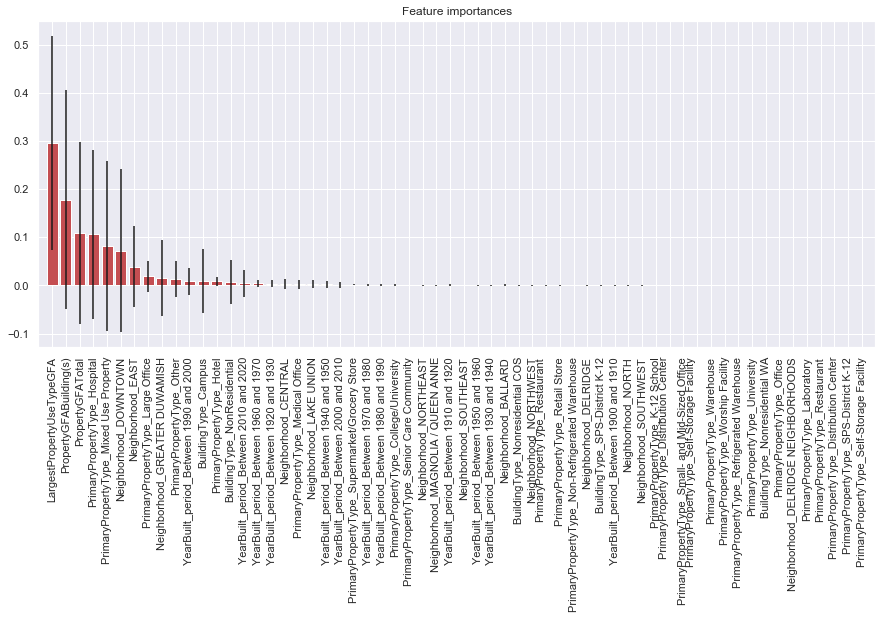


 {'ccp_alpha': 0.001, 'criterion': 'mse', 'max_depth': 6, 'n_estimators': 150}

RMSE of RandomForestRegressor with GridSearchCV (training set): 286.02

RMSE of RandomForestRegressor with GridSearchCV (test set): 403.96 time 375.54s

RMSE of RandomForestRegressor with GridSearchCV (test set) normalizes: 0.02
R2 score of RandomForestRegressor with GridSearchCV: 0.70


In [15]:
# Random Forest

%matplotlib inline
sns.set()

from sklearn.ensemble import RandomForestRegressor
# n_estimators': 100
start_time = timeit.default_timer()
rfRegr = RandomForestRegressor(random_state=0).fit(X_train_std, y_train)

print("Random forest regressor params: \n", rfRegr.get_params())

y_pred = rfRegr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of RandomForestRegressor (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, rfRegr.predict(X_train_std)))))
print("\nRMSE of RandomForestRegressor (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of RandomForestRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of RandomForestRegressor: {:.2f}".format(rfRegr.score(X_test_std, y_test)))
perfDict.update( {'RandomForestRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), rfRegr.score(X_test_std, y_test), elapsed]} )

from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(rfRegr, prefit=True)
print(select.get_params())
X_train_red = select.transform(X_train_std) # threshold
X_test_red = select.transform(X_test_std)

print(X_train_std.shape)
print(X_train_red.shape)
print(X_test_std.shape)
print(X_test_red.shape)

# Show features importances
importances = rfRegr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfRegr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print and plot the feature ranking
columnsNames = dummyDf_na.loc[:, dummyDf_na.columns != 'GHGEmissions(MetricTonsCO2e)'].columns
print("Feature ranking:")

for f in range(X_train_std.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], columnsNames[indices[f]] , importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
# plt.figure()
fig = plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(X_train_std.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_std.shape[1]), columnsNames[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.show()


# Cross validation
# 'n_estimators': range(50, 200, 5),
# 'max_depth'
# ccp_alpha: non-negative float, default=0.0: Complexity parameter used for Minimal Cost-Complexity Pruning
# Greater values of ccp_alpha increase the number of nodes pruned
param_grid = {'n_estimators': range(50, 200, 50),
              'max_depth' : range(1, 20, 5),
              'criterion': ['mse', 'mae'],
              'ccp_alpha': np.logspace(-3, 3, 3)
             }

grid_pred = model_selection.GridSearchCV(rfRegr, param_grid, cv=3)

start_time = timeit.default_timer()                                                                                                    
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of RandomForestRegressor with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))))
print("\nRMSE of RandomForestRegressor with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of RandomForestRegressor with GridSearchCV (test set) normalizes: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of RandomForestRegressor with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDict.update( {'RandomForestRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )


In [16]:
# Sequential models
# AdaBoost

from sklearn.ensemble import AdaBoostRegressor

#n_estimators=50
start_time = timeit.default_timer()
abr = AdaBoostRegressor(random_state=0).fit(X_train_std, y_train)

print("Adaboost regressor params: \n", abr.get_params())

y_pred = abr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of AdaBoostRegressor (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, abr.predict(X_train_std)))))
print("\nRMSE of AdaBoostRegressor (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of AdaBoostRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of AdaBoostRegressor: {:.2f}".format(abr.score(X_test_std, y_test)))
perfDict.update( {'AdaBoostRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), abr.score(X_test_std, y_test), elapsed]} )

# Cross validation
param_grid = {'n_estimators': range(50, 300, 50),
              'learning_rate': np.logspace(-2, 2, 10),
              'loss': ['linear', 'square', 'exponential']
             }
grid_pred = model_selection.GridSearchCV(abr, param_grid, cv=5)

start_time = timeit.default_timer()
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of AdaBoostRegressor with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))))
print("\nRMSE of AdaBoostRegressor with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of AdaBoostRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of AdaBoostRegressor  with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDict.update( {'AdaBoostRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )


Adaboost regressor params: 
 {'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': 0}

RMSE of AdaBoostRegressor (training set): 368.18

RMSE of AdaBoostRegressor (test set): 583.34 time 0.14s

RMSE of AdaBoostRegressor (test set) normalized: 0.03
R2 score of AdaBoostRegressor: 0.37

 {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50}

RMSE of AdaBoostRegressor with GridSearchCV (training set): 242.54

RMSE of AdaBoostRegressor with GridSearchCV (test set): 651.94 time 154.41s

RMSE of AdaBoostRegressor with GridSearchCV (test set) normalized: 0.04
R2 score of AdaBoostRegressor  with GridSearchCV: 0.21


In [17]:
# GradientBoosting

from sklearn.ensemble import GradientBoostingRegressor

start_time = timeit.default_timer()
gbr = GradientBoostingRegressor(random_state=0).fit(X_train_std, y_train)
print("Gradient boosting regressor params: \n", gbr.get_params())

y_pred = gbr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, gbr.predict(X_train_std)))))
print("\nRMSE of GradientBoostingRegressor (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of GradientBoostingRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of GradientBoostingRegressor: {:.2f}".format(gbr.score(X_test_std, y_test)))
perfDict.update( {'GradientBoostingRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), gbr.score(X_test_std, y_test), elapsed]} )

# Cross validation
# loss: ['ls', 'lad', 'huber', 'quantile']
# use alpha if 'huber' or 'quantile'
# 'criterion': ['friedman_mse', 'mse', 'mae']
# 'learning_rate': np.logspace(-1, 1, 5)
# 'n_estimators': range(50, 300, 50)
# 'max_depth': range(1, 10, 2)
param_grid = {'criterion': ['friedman_mse', 'mse', 'mae']
             }
grid_pred = model_selection.GridSearchCV(gbr, param_grid, cv=5)

start_time = timeit.default_timer()              
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of GradientBoostingRegressor with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDict.update( {'GradientBoostingRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )


Gradient boosting regressor params: 
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

RMSE of GradientBoostingRegressor (training set): 119.92

RMSE of GradientBoostingRegressor (test set): 419.46 time 0.19s

RMSE of GradientBoostingRegressor (test set) normalized: 0.02
R2 score of GradientBoostingRegressor: 0.67

 {'criterion': 'mae'}

RMSE of GradientBoostingRegressor with GridSearchCV (training set): 148.97

RMSE of GradientBoostingRegressor with GridSearchCV (test set): 367.89 time 33.23s

RMSE of GradientBoostingRegressor with GridSearch

In [18]:
# Voting regressor
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = MLPRegressor(random_state=0, tol=1e-2, max_iter=500, learning_rate_init=0.1)
reg2 = BaggingRegressor(random_state=0, n_estimators=68)
reg3 = AdaBoostRegressor(random_state=0)
reg4 = RandomForestRegressor(random_state=0)
reg5 = GradientBoostingRegressor(random_state=0, criterion='mae')
reg6 = SVR(C=10000, gamma=0.01)
reg7 = LinearSVR(random_state=0, tol=1e-5, dual=False, loss='squared_epsilon_insensitive', C=0.0003)


start_time = timeit.default_timer()
votr = VotingRegressor(estimators=[('mplr', reg1), ('bgr', reg2), ('abr', reg3), ('rfr', reg4),
                                   ('gbr', reg5), ('svr', reg6), ('lsvr', reg7)]).fit(X_train_std, y_train)

y_pred = votr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of VotingRegressor (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, votr.predict(X_train_std)))))
print("\nRMSE of VotingRegressor (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of VotingRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of VotingRegressor: {:.2f}".format(votr.score(X_test_std, y_test)))
perfDict.update( {'VotingRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), votr.score(X_test_std, y_test), elapsed]} )



RMSE of VotingRegressor (training set): 236.79

RMSE of VotingRegressor (test set): 298.47 time 9.34s

RMSE of VotingRegressor (test set) normalized: 0.02
R2 score of VotingRegressor: 0.83


Mean dummy model:
RMSE: 7.3e+02
R2: -0.00
Elapsed time: 0.00


Linear reg:
RMSE: 8.1e+02
R2: -0.21
Elapsed time: 0.14


LinearReg-GridSearchCV:
RMSE: 8.1e+02
R2: -0.21
Elapsed time: 0.13


RidgeCV:
RMSE: 7.6e+02
R2: -0.07
Elapsed time: 0.10


LassoCV:
RMSE: 8.1e+02
R2: -0.21
Elapsed time: 0.18


ElasticNetCV:
RMSE: 7e+02
R2: 0.10
Elapsed time: 0.41


Linear SVR:
RMSE: 8e+02
R2: -0.19
Elapsed time: 0.01


Linear SVR-GridSearchCV:
RMSE: 3.9e+02
R2: 0.71
Elapsed time: 1.99


SVR:
RMSE: 7.4e+02
R2: -0.03
Elapsed time: 0.15


SVR-GridSearchCV:
RMSE: 5.4e+02
R2: 0.46
Elapsed time: 25.27


Kernel Ridge:
RMSE: 6.3e+02
R2: 0.26
Elapsed time: 0.07


Kernel Ridge-GridSearchCV:
RMSE: 5.7e+02
R2: 0.40
Elapsed time: 4.83


MLPRegressor:
RMSE: 2.1e+03
R2: -7.30
Elapsed time: 0.49


MLPRegressor-GridSearchCV:
RMSE: 2.1e+03
R2: -7.57
Elapsed time: 13.88


BaggingRegressor:
RMSE: 4.6e+02
R2: 0.61
Elapsed time: 0.08


BaggingRegressor-GridSearchCV:
RMSE: 4.1e+02
R2: 0.69
Elapsed time: 73.12


RandomFores

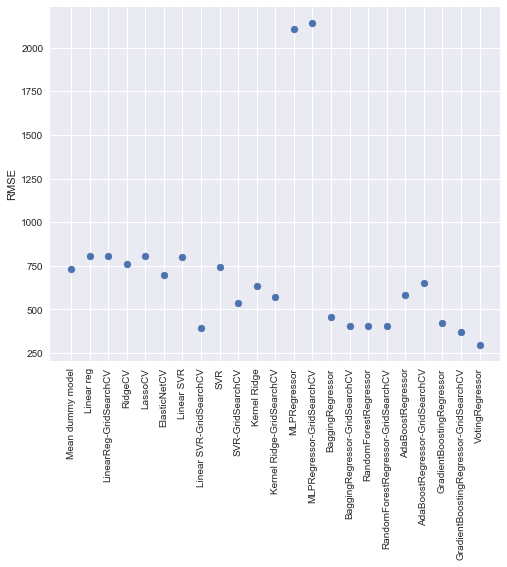

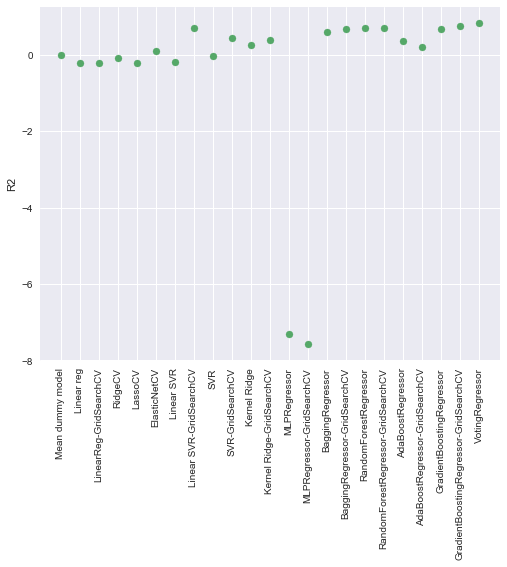

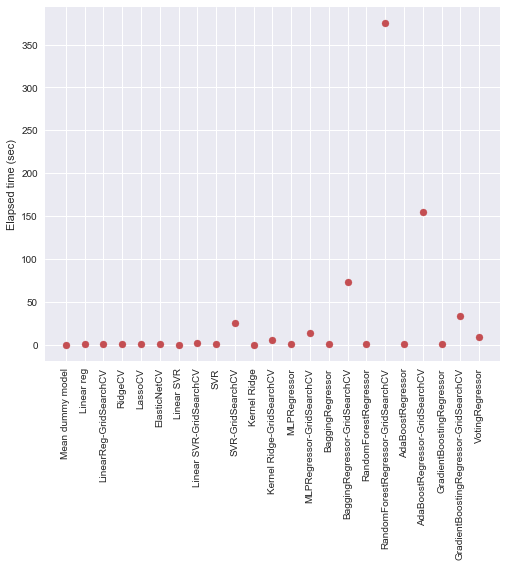

In [19]:
# Print and plot different tested models performances
for key, values in perfDict.items():
    print(key + ':')
    print('RMSE: {:.2g}'.format(values[0]))
    print('R2: {:.2f}'.format(values[1]))
    print('Elapsed time: {:.2f}'.format(values[2]))
    print('\n')
    
plt.style.use('seaborn')
# Set appropriate colors map for color blindness 
plt.set_cmap('coolwarm')
ax = plt.axes()

plt.scatter(list(perfDict.keys()), [item[0] for item in list(perfDict.values())])
plt.ylabel('RMSE')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

plt.scatter(list(perfDict.keys()), [item[1] for item in list(perfDict.values())], c='g')
plt.ylabel('R2')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

plt.scatter(list(perfDict.keys()), [item[2] for item in list(perfDict.values())], c='r')
plt.ylabel('Elapsed time (sec)')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

### Evaluate ENERGYSTARScore benefit

In [20]:
# Evaluate the benefit of ENERGYSTARScore in 'GHGEmissions(MetricTonsCO2e)' prediction
# Add ENERGYSTARScore feature to the independant variables
simplifiedDf_dum = nonResDataWtOut[['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood',
                            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
                             'GHGEmissions(MetricTonsCO2e)']]
dummyDf = pd.get_dummies(simplifiedDf_dum, columns=['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood'])

print(dummyDf.shape)
for col in dummyDf.columns:
    if dummyDf[col].isnull().mean()*100 > 3:
        print(col)
        print(dummyDf[col].isnull().mean()*100)
dummyDf_na = dummyDf.dropna(how='any')
print("Dataframe with the dependant variable:")
print(dummyDf_na.shape)
display(dummyDf_na.head())

print("Dataframe without the dependant variable:")
display(dummyDf_na.loc[:, dummyDf_na.columns != 'GHGEmissions(MetricTonsCO2e)'].head())

X = dummyDf_na.loc[:, dummyDf_na.columns != 'GHGEmissions(MetricTonsCO2e)'].values
y = dummyDf_na['GHGEmissions(MetricTonsCO2e)'].values

print("y min and max values: ", y.min(), y.max())
y_range_emissions = y.max()-y.min()
print("Range of y values: ", y_range_emissions)
print("X min and max values: ", X.min(), X.max())

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                test_size=0.3, random_state=0)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

print("X_train_std min and max values: ", X_train_std.min(), X_train_std.max())
print("X_test_std min and max values: ", X_test_std.min(), X_test_std.max())


(1674, 62)
LargestPropertyUseTypeGFA
3.942652329749104
ENERGYSTARScore
33.09438470728793
Dataframe with the dependant variable:
(1069, 62)


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,65.0,249.43,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,51.0,263.51,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,18.0,2061.48,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1.0,1936.34,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,67.0,507.70,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


Dataframe without the dependant variable:


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,65.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,51.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,18.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,67.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


y min and max values:  0.31 16870.98
Range of y values:  16870.67
X min and max values:  -43310.0 1952220.0
X_train_std min and max values:  -2.8305561631543448 27.331300737432965
X_test_std min and max values:  -2.8305561631543448 27.33130073743295


In [21]:
# Retest the best models got earlier which are GradientBoostingRegressor & VotingRegressor
start_time = timeit.default_timer()
gbr = GradientBoostingRegressor(random_state=0).fit(X_train_std, y_train)
print("Gradient boosting regressor params: \n", gbr.get_params())

y_pred = gbr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, gbr.predict(X_train_std)))))
print("\nRMSE of GradientBoostingRegressor (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of GradientBoostingRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of GradientBoostingRegressor: {:.2f}".format(gbr.score(X_test_std, y_test)))


# Cross validation
# loss: ['ls', 'lad', 'huber', 'quantile']
# use alpha if 'huber' or 'quantile'
# 'criterion': ['friedman_mse', 'mse', 'mae']
# 'max_depth': range(1, 10, 2)
# To optimize:
#  'learning_rate': np.logspace(-1, 1, 5)
# 'n_estimators': range(50, 300, 50)
param_grid = {'criterion': ['friedman_mse', 'mse', 'mae'],
              'n_estimators': range(50, 150, 50),
              'max_depth': range(1, 10, 3)
             }
grid_pred = model_selection.GridSearchCV(gbr, param_grid, cv=3)

start_time = timeit.default_timer()              
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of GradientBoostingRegressor with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))

Gradient boosting regressor params: 
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

RMSE of GradientBoostingRegressor (training set): 67.90

RMSE of GradientBoostingRegressor (test set): 255.74 time 0.13s

RMSE of GradientBoostingRegressor (test set) normalized: 0.02
R2 score of GradientBoostingRegressor: 0.84

 {'criterion': 'mae', 'max_depth': 4, 'n_estimators': 100}

RMSE of GradientBoostingRegressor with GridSearchCV (training set): 60.29

RMSE of GradientBoostingRegressor with GridSearchCV (test set): 572.42 time 35.58s

RMSE of Gradie

In [22]:
# VotingRegressor
reg1 = MLPRegressor(random_state=0, tol=1e-2, max_iter=500, learning_rate_init=0.1)
reg2 = BaggingRegressor(random_state=0, n_estimators=68)
reg3 = AdaBoostRegressor(random_state=0)
reg4 = RandomForestRegressor(random_state=0)
reg5 = GradientBoostingRegressor(random_state=0, criterion='mae')
reg6 = SVR(C=10000, gamma=0.01)
# reg7 = LinearSVR(random_state=0, tol=1e-5, dual=False, loss='squared_epsilon_insensitive', C=0.0003)


start_time = timeit.default_timer()
votr = VotingRegressor(estimators=[('mplr', reg1), ('bgr', reg2), ('abr', reg3), ('rfr', reg4),
                                   ('gbr', reg5), ('svr', reg6)]).fit(X_train_std, y_train)

y_pred = votr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of VotingRegressor (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, votr.predict(X_train_std)))))
print("\nRMSE of VotingRegressor (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of VotingRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of VotingRegressor: {:.2f}".format(votr.score(X_test_std, y_test)))



RMSE of VotingRegressor (training set): 148.74

RMSE of VotingRegressor (test set): 262.86 time 4.93s

RMSE of VotingRegressor (test set) normalized: 0.02
R2 score of VotingRegressor: 0.83


Random forest regressor params: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RMSE of RandomForestRegressor (training set): 249.53

RMSE of RandomForestRegressor (test set): 335.54 time 0.52s

RMSE of RandomForestRegressor (test set) normalized: 0.02
R2 score of RandomForestRegressor: 0.73
Feature ranking:
1. feature 2: LargestPropertyUseTypeGFA (0.277130)
2. feature 3: ENERGYSTARScore (0.150991)
3. feature 7: PrimaryPropertyType_Hospital (0.106239)
4. feature 30: BuildingType_Campus (0.101847)
5. feature 1: PropertyGFABuilding(s) (0.086741)
6. feature 0: PropertyGFATotal (0.073357)
7. feature 13: PrimaryPropertyType_Mixed Use Property (0.0

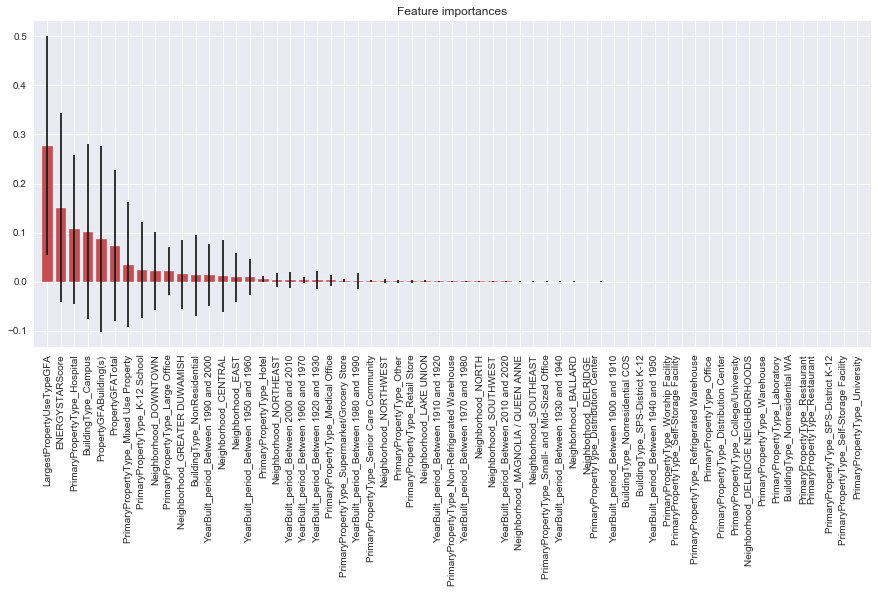

In [23]:
# Random Forest

start_time = timeit.default_timer()
rfRegr = RandomForestRegressor(random_state=0).fit(X_train_std, y_train)

print("Random forest regressor params: \n", rfRegr.get_params())

y_pred = rfRegr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of RandomForestRegressor (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, rfRegr.predict(X_train_std)))))
print("\nRMSE of RandomForestRegressor (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of RandomForestRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of RandomForestRegressor: {:.2f}".format(rfRegr.score(X_test_std, y_test)))


# Show features importances
importances = rfRegr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfRegr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print and plot the feature ranking
columnsNames = dummyDf_na.loc[:, dummyDf_na.columns != 'GHGEmissions(MetricTonsCO2e)'].columns
print("Feature ranking:")

for f in range(X_train_std.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], columnsNames[indices[f]] , importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
# plt.figure()
fig = plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(X_train_std.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_std.shape[1]), columnsNames[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.show()



### Perform PCA

,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,65.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,51.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,18.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,67.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


(1674, 61)
LargestPropertyUseTypeGFA
3.942652329749104
ENERGYSTARScore
33.09438470728793
(1069, 61)
[0.07478976 0.06042232 0.04038478 0.03436531 0.03127401 0.02954103
 0.02851227 0.0270665  0.02637514 0.02557076 0.02514883 0.02461607
 0.02384931 0.02334033 0.02312808 0.02288153 0.02232521 0.02194622
 0.0216385  0.021272   0.02069496 0.02046486 0.01999141 0.01979166
 0.01944294 0.01927084 0.01900261 0.01869485 0.01852989 0.01802119
 0.01760951 0.01738448 0.01694698 0.01688519 0.01603868 0.01576908
 0.01474673 0.01370033 0.01337681 0.01308708 0.01072586 0.01001131
 0.00871763 0.00721691 0.00429801 0.00083382 0.00029843]
1.0
[0.07478976 0.13521209 0.17559687 0.20996217 0.24123618 0.27077722
 0.29928948 0.32635599 0.35273113 0.37830188 0.40345071 0.42806678
 0.45191609 0.47525642 0.4983845  0.52126603 0.54359124 0.56553746
 0.58717596 0.60844796 0.62914292 0.64960779 0.66959919 0.68939086
 0.70883379 0.72810464 0.74710725 0.7658021  0.78433198 0.80235317
 0.81996268 0.83734717 0.85429414 0

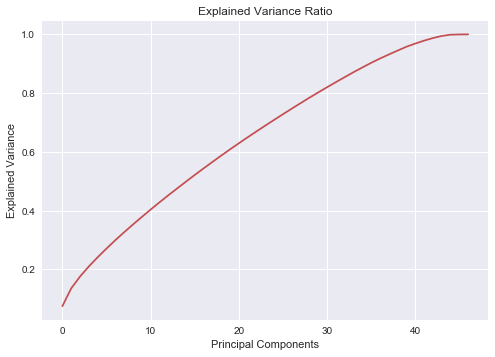

(-1, 1)

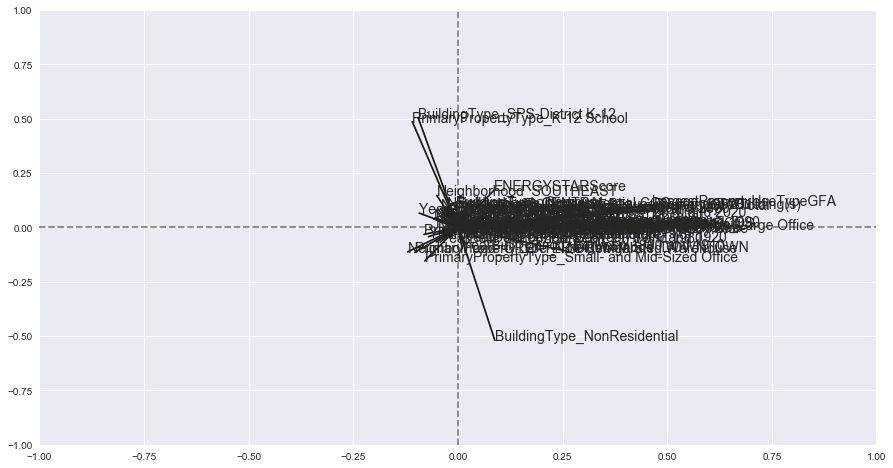

In [24]:
from sklearn import decomposition

simplifiedDf_dum = nonResDataWtOut[['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood',
                            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore']]
dummyDf = pd.get_dummies(simplifiedDf_dum, columns=['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood'])
display(dummyDf.head())
print(dummyDf.shape)
for col in dummyDf.columns:
    if dummyDf[col].isnull().mean()*100 > 3:
        print(col)
        print(dummyDf[col].isnull().mean()*100)
dummyDf_na = dummyDf.dropna(how='any')
print(dummyDf_na.shape)

X = dummyDf_na.values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components=47) #47
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


cumulative = np.cumsum(pca.explained_variance_ratio_)
print(cumulative)

plt.plot(range(0,47), cumulative, 'r')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

pcs = pca.components_

fig = plt.figure(figsize=(15,8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, dummyDf_na.columns[i], fontsize='14')

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlim([-1, 1])
plt.ylim([-1, 1])

### Apply PCA

In [25]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_pca.shape)
print(X_test_pca.shape)

start_time = timeit.default_timer()
gbr = GradientBoostingRegressor(random_state=0).fit(X_train_pca, y_train)
print("Gradient boosting regressor params: \n", gbr.get_params())

y_pred = gbr.predict(X_test_pca)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor with PCA (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, gbr.predict(X_train_pca)))))
print("\nRMSE of GradientBoostingRegressor with PCA (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of GradientBoostingRegressor with PCA (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of GradientBoostingRegressor with PCA: {:.2f}".format(gbr.score(X_test_pca, y_test)))



param_grid = {'criterion': ['friedman_mse', 'mse', 'mae'],
              'n_estimators': range(20, 100, 30),
              'max_depth': range(1, 10, 3)
             }

grid_pred = model_selection.GridSearchCV(gbr, param_grid, cv=5)

start_time = timeit.default_timer()              
grid_pred.fit(X_train_pca, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_pca)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (PCA) (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_pca)))))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (PCA) (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (PCA) (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of GradientBoostingRegressor with GridSearchCV (PCA): {:.2f}".format(r2_score(y_test, y_pred)))


(748, 47)
(321, 47)
Gradient boosting regressor params: 
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

RMSE of GradientBoostingRegressor with PCA (training set): 62.72

RMSE of GradientBoostingRegressor with PCA (test set): 212.28 time 0.66s

RMSE of GradientBoostingRegressor with PCA (test set) normalized: 0.01
R2 score of GradientBoostingRegressor with PCA: 0.89

 {'criterion': 'friedman_mse', 'max_depth': 1, 'n_estimators': 20}

RMSE of GradientBoostingRegressor with GridSearchCV (PCA) (training set): 431.91

RMSE of GradientBoostingReg

In [26]:
# Training classifiers of voting regressor
reg1 = MLPRegressor(random_state=0, tol=1e-2, max_iter=500, learning_rate_init=0.1)
reg2 = BaggingRegressor(random_state=0, n_estimators=68)
reg3 = AdaBoostRegressor(random_state=0)
reg4 = RandomForestRegressor(random_state=0)
reg5 = GradientBoostingRegressor(random_state=0, criterion='mae')
reg6 = SVR(C=10000, gamma=0.01)
# reg7 = LinearSVR(random_state=0, tol=1e-5, dual=False, loss='squared_epsilon_insensitive', C=0.0003)


start_time = timeit.default_timer()
votr = VotingRegressor(estimators=[('mplr', reg1), ('bgr', reg2), ('abr', reg3), ('rfr', reg4),
                                   ('gbr', reg5), ('svr', reg6)]).fit(X_train_pca, y_train)

y_pred = votr.predict(X_test_pca)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of VotingRegressor with PCA (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, votr.predict(X_train_pca)))))
print("\nRMSE of VotingRegressor with PCA (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of VotingRegressor with PCA (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of VotingRegressor with PCA: {:.2f}".format(votr.score(X_test_pca, y_test)))



RMSE of VotingRegressor with PCA (training set): 148.66

RMSE of VotingRegressor with PCA (test set): 222.13 time 18.98s

RMSE of VotingRegressor with PCA (test set) normalized: 0.01
R2 score of VotingRegressor with PCA: 0.88


### Compare with PCA and without ENERGYSTARScore

,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


(1674, 60)
LargestPropertyUseTypeGFA
3.942652329749104
(1608, 60)
[0.06406812 0.05030826 0.03758665 0.03226058 0.03026134 0.02820736
 0.02662505 0.02463549 0.02434182 0.0238723  0.02300615 0.02276621
 0.02244037 0.02184649 0.0216757  0.02153921 0.02110254 0.02062996
 0.02024814 0.01990617 0.01985239 0.01945409 0.0192553  0.01878067
 0.01864104 0.01849575 0.01839681 0.01827414 0.01788533 0.01765085
 0.01744319 0.01730694 0.01683772 0.01673183 0.01661418 0.01647883
 0.01625402 0.01585793 0.01509277 0.01491003 0.01397276 0.0133191
 0.01309587 0.01259071 0.01146587 0.00927955 0.00777878 0.00662801
 0.00387855 0.00030713 0.00014195]
0.9999999999999999
[0.06406812 0.11437637 0.15196302 0.1842236  0.21448494 0.24269231
 0.26931735 0.29395285 0.31829467 0.34216697 0.36517312 0.38793933
 0.41037971 0.43222619 0.45390189 0.4754411  0.49654364 0.5171736
 0.53742174 0.55732791 0.5771803  0.59663439 0.61588968 0.63467035
 0.65331139 0.67180715 0.69020396 0.70847809 0.72636342 0.74401427
 0.76145747

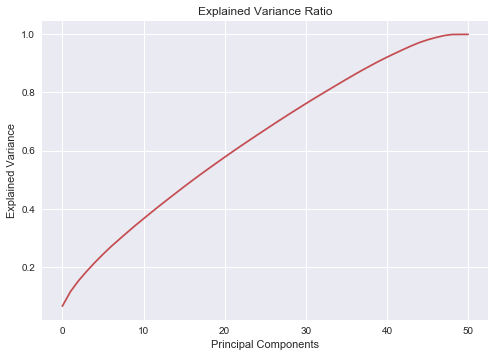

(-1, 1)

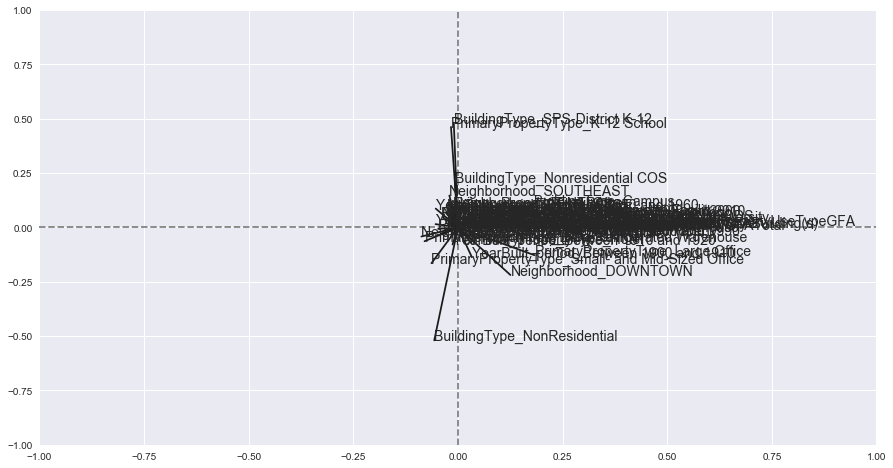

In [27]:
simplifiedDf_dum = nonResDataWtOut[['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood',
                            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA']]
dummyDf = pd.get_dummies(simplifiedDf_dum, columns=['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood'])
display(dummyDf.head())
print(dummyDf.shape)
for col in dummyDf.columns:
    if dummyDf[col].isnull().mean()*100 > 3:
        print(col)
        print(dummyDf[col].isnull().mean()*100)
dummyDf_na = dummyDf.dropna(how='any')
print(dummyDf_na.shape)

X = dummyDf_na.values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components=51)
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


cumulative = np.cumsum(pca.explained_variance_ratio_)
print(cumulative)

plt.plot(range(0,51), cumulative, 'r')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

pcs = pca.components_

fig = plt.figure(figsize=(15,8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, dummyDf_na.columns[i], fontsize='14')

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlim([-1, 1])
plt.ylim([-1, 1])

In [28]:
simplifiedDf_dum = nonResDataWtOut[['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood',
                            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
                             'GHGEmissions(MetricTonsCO2e)']]
dummyDf = pd.get_dummies(simplifiedDf_dum, columns=['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood'])

print(dummyDf.shape)
for col in dummyDf.columns:
    if dummyDf[col].isnull().mean()*100 > 3:
        print(col)
        print(dummyDf[col].isnull().mean()*100)
dummyDf_na = dummyDf.dropna(how='any')
print("Dataframe with the dependant variable:")
print(dummyDf_na.shape)
display(dummyDf_na.head())

print("Dataframe without the dependant variable:")
display(dummyDf_na.loc[:, dummyDf_na.columns != 'GHGEmissions(MetricTonsCO2e)'].head())

X = dummyDf_na.loc[:, dummyDf_na.columns != 'GHGEmissions(MetricTonsCO2e)'].values
y = dummyDf_na['GHGEmissions(MetricTonsCO2e)'].values

print("y min and max values: ", y.min(), y.max())
y_range_emissions = y.max()-y.min()
print("Range of y values: ", y_range_emissions)
print("X min and max values: ", X.min(), X.max())

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                test_size=0.3, random_state=0)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# Apply PCA

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_pca.shape)
print(X_test_pca.shape)

start_time = timeit.default_timer()
gbr = GradientBoostingRegressor(random_state=0).fit(X_train_pca, y_train)
print("Gradient boosting regressor params: \n", gbr.get_params())

y_pred = gbr.predict(X_test_pca)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor with PCA (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, gbr.predict(X_train_pca)))))
print("\nRMSE of GradientBoostingRegressor with PCA (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of GradientBoostingRegressor with PCA (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of GradientBoostingRegressor with PCA: {:.2f}".format(gbr.score(X_test_pca, y_test)))


param_grid = {'criterion': ['friedman_mse', 'mse', 'mae'],
              'n_estimators': range(10, 60, 20),
              'max_depth': range(1, 7, 3)
             }
grid_pred = model_selection.GridSearchCV(gbr, param_grid, cv=3)

start_time = timeit.default_timer()              
grid_pred.fit(X_train_pca, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_pca)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (PCA) (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_pca)))))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (PCA) (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (PCA) (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of GradientBoostingRegressor with GridSearchCV (PCA): {:.2f}".format(r2_score(y_test, y_pred)))

(1674, 61)
LargestPropertyUseTypeGFA
3.942652329749104
Dataframe with the dependant variable:
(1601, 61)


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GHGEmissions(MetricTonsCO2e),PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,249.43,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,263.51,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,2061.48,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1936.34,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,507.70,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Dataframe without the dependant variable:


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


y min and max values:  0.0 16870.98
Range of y values:  16870.98
X min and max values:  -50550.0 9320156.0
(1120, 51)
(481, 51)
Gradient boosting regressor params: 
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

RMSE of GradientBoostingRegressor with PCA (training set): 88.62

RMSE of GradientBoostingRegressor with PCA (test set): 525.30 time 1.16s

RMSE of GradientBoostingRegressor with PCA (test set) normalized: 0.03
R2 score of GradientBoostingRegressor with PCA: 0.49

 {'criterion': 'friedman_mse', 'max_depth': 4, 'n_estimators': 10}

R

In [29]:
# Training classifiers of voting regressor
reg1 = MLPRegressor(random_state=0, tol=1e-2, max_iter=500, learning_rate_init=0.1)
reg2 = BaggingRegressor(random_state=0, n_estimators=68)
reg3 = AdaBoostRegressor(random_state=0)
reg4 = RandomForestRegressor(random_state=0)
reg5 = GradientBoostingRegressor(random_state=0, criterion='mae')
reg6 = SVR(C=10000, gamma=0.01)
reg7 = LinearSVR(random_state=0, tol=1e-5, dual=False, loss='squared_epsilon_insensitive', C=0.0003)


start_time = timeit.default_timer()
votr = VotingRegressor(estimators=[('mplr', reg1), ('bgr', reg2), ('abr', reg3), ('rfr', reg4),
                                   ('gbr', reg5), ('svr', reg6), ('lsvr', reg7)]).fit(X_train_pca, y_train)

y_pred = votr.predict(X_test_pca)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of VotingRegressor with PCA (training set): {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_train, votr.predict(X_train_pca)))))
print("\nRMSE of VotingRegressor with PCA (test set): {:.2f} time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), elapsed))
print("\nRMSE of VotingRegressor with PCA (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_emissions))
print("R2 score of VotingRegressor with PCA: {:.2f}".format(votr.score(X_test_pca, y_test)))


RMSE of VotingRegressor with PCA (training set): 232.37

RMSE of VotingRegressor with PCA (test set): 404.90 time 42.54s

RMSE of VotingRegressor with PCA (test set) normalized: 0.02
R2 score of VotingRegressor with PCA: 0.69


## Prediction of SiteEnergyUse(kBtu)

In [30]:
# Predict 'SiteEnergyUse(kBtu)'

simplifiedDf_dum = nonResDataWtOut[['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood',
                            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'NumberofBuildings',
                             'SiteEnergyUse(kBtu)']]
dummyDf = pd.get_dummies(simplifiedDf_dum, columns=['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood'])


print(dummyDf.shape)
for col in dummyDf.columns:
    if dummyDf[col].isnull().mean()*100 > 3:
        print(col)
        print(dummyDf[col].isnull().mean()*100)
dummyDf_na = dummyDf.dropna(how='any')

print("Dataframe with the dependant variable:")
print(dummyDf_na.shape)
display(dummyDf_na.head())

print("Dataframe without the dependant variable:")
display(dummyDf_na.loc[:, dummyDf_na.columns != 'SiteEnergyUse(kBtu)'].head())

X = dummyDf_na.loc[:, dummyDf_na.columns != 'SiteEnergyUse(kBtu)'].values
y = dummyDf_na['SiteEnergyUse(kBtu)'].values

print("y min and max values: ", y.min(), y.max())
y_range_energy = y.max()-y.min()
print("Range of y values: ", y_range_energy)
print("X min and max values: ", X.min(), X.max())

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                test_size=0.3, random_state=0)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

print("X_train_std min and max values: ", X_train_std.min(), X_train_std.max())
print("X_test_std min and max values: ", X_test_std.min(), X_test_std.max())


(1674, 62)
LargestPropertyUseTypeGFA
3.942652329749104
Dataframe with the dependant variable:
(1601, 62)


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofBuildings,SiteEnergyUse(kBtu),PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,1.0,6981428.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,1.0,8354235.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,1.0,73130656.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1.0,28229320.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,1.0,14829099.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


Dataframe without the dependant variable:


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofBuildings,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


y min and max values:  0.0 873923712.0
Range of y values:  873923712.0
X min and max values:  -50550.0 9320156.0
X_train_std min and max values:  -2.582872988885145 33.45145736735538
X_test_std min and max values:  -2.582872988885145 164.9908907147771


In [31]:
# Random model
start_time = timeit.default_timer()
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)
elapsed = timeit.default_timer() - start_time
print("RMSE of random prediction model : {:.2f} e6 time {:.4f}s"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred_random) )/1e6, elapsed))
print("R2 score of random prediction model : {:.2f}".format(r2_score(y_test, y_pred_random)))

# Dummy mean regressor
dum = dummy.DummyRegressor(strategy='mean')
start_time = timeit.default_timer()
# Train
dum.fit(X_train_std, y_train)
# Predict
y_pred_dum = dum.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
# Evaluate
print("RMSE of mean dummy regressor (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, dum.predict(X_train_std)))/1e6))
print("RMSE of mean dummy regressor (test set): {:.2f} e6 time {:.4f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum))/1e6, elapsed ))
print("RMSE of mean dummy regressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum))/y_range_energy ))
print("R2 score of mean dummy regressor : {:.2f}".format(r2_score(y_test, y_pred_dum)))
perfDictEnergy = { 'Mean dummy model': [np.sqrt( metrics.mean_squared_error(y_test, y_pred_dum)), r2_score(y_test, y_pred_dum), elapsed] }

# Linear Regression
lr = linear_model.LinearRegression()
start_time = timeit.default_timer()
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("RMSE of linear regression model (training set): {:.2f} e6"
      .format(np.sqrt( metrics.mean_squared_error(y_train, lr.predict(X_train_std)) )/1e6))
print("RMSE of linear regression model (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )/1e6, elapsed))
print("RMSE of linear regression model (test set) normalized: {:.2f}"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )/y_range_energy))
print("R2 score of linear regression model : {:.2f}".format(lr.score(X_test_std, y_test)))
perfDictEnergy.update( {'Linear reg':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), lr.score(X_test_std, y_test), elapsed]} )


RMSE of random prediction model : 504.42 e6 time 0.0003s
R2 score of random prediction model : -124.16
RMSE of mean dummy regressor (training set): 21.99 e6
RMSE of mean dummy regressor (test set): 45.12 e6 time 0.0008s
RMSE of mean dummy regressor (test set) normalized: 0.05
R2 score of mean dummy regressor : -0.00
RMSE of linear regression model (training set): 13.65 e6
RMSE of linear regression model (test set): 17.31 e6 time 0.00s
RMSE of linear regression model (test set) normalized: 0.02
R2 score of linear regression model : 0.85


In [32]:
# Linear Regression cross validation
print("LR params: \n", linear_model.LinearRegression().get_params())

params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

# Choose a score to optimize, here mean squared error
score = 'neg_mean_squared_error'

clf = model_selection.GridSearchCV(
    linear_model.LinearRegression(),
    params,
    cv=5,          # nb of folds of cross validation
    scoring=score
)

start_time = timeit.default_timer()
clf.fit(X_train_std, y_train)

print("\nBest hyperparameters on training set:")
print(clf.best_params_)

# Display corresponding performances
print("\nCross validation results :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],
        clf.cv_results_['std_test_score'],
        clf.cv_results_['params']
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )
    
y_pred = clf.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of linear regression with GridSearchCV (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, clf.predict(X_train_std)))/1e6))
print("\nRMSE of linear regression with GridSearchCV (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of linear regression with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of linear regression with GridSearchCV : {:.2f}".format(r2_score(y_test, y_pred)))
perfDictEnergy.update( {'LinearReg-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )

LR params: 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Best hyperparameters on training set:
{'copy_X': True, 'fit_intercept': True, 'normalize': False}

Cross validation results :
neg_mean_squared_error = -48375138981703076636492866421773635297450207822654858420031657573613568.000 (+/-193500555926812306545971465687094541189800831290619433680126630294454272.000) for {'copy_X': True, 'fit_intercept': True, 'normalize': True}
neg_mean_squared_error = -41605773748207299233462960747696873275392.000 (+/-126699685813112707902583520597207909662720.000) for {'copy_X': True, 'fit_intercept': True, 'normalize': False}
neg_mean_squared_error = -45933073192146388620686201963930561019904.000 (+/-183732292768585554482744807855722244079616.000) for {'copy_X': True, 'fit_intercept': False, 'normalize': True}
neg_mean_squared_error = -45933073192146388620686201963930561019904.000 (+/-183732292768585554482744807855722244079616.000) for {'copy_X': True, 'fit_intercept':

In [33]:
# Ridge CV
print("RidgeCV params: \n", RidgeCV().get_params())

score = 'neg_mean_squared_error'
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
# cv=None, to use the efficient Leave-One-Out cross-validation, incompatible with store_cv_values=True
start_time = timeit.default_timer()
clf = RidgeCV(alphas=alphas, scoring=score, store_cv_values=True).fit(X_train_std, y_train)

alpha = clf.alpha_
print("\nalpha: {:.2f}".format(alpha))

y_pred = clf.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of RidgeCV (training set): {:.2f} e6".format(np.sqrt(metrics.mean_squared_error(y_train, clf.predict(X_train_std)))/1e6))
print("\nRMSE of RidgeCV (test set): {:.2f} e6 time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of RidgeCV (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of RidgeCV : {:.2f}".format(clf.score(X_test_std, y_test)))
perfDictEnergy.update( {'RidgeCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), clf.score(X_test_std, y_test), elapsed]} )

RidgeCV params: 
 {'alphas': array([ 0.1,  1. , 10. ]), 'cv': None, 'fit_intercept': True, 'gcv_mode': None, 'normalize': False, 'scoring': None, 'store_cv_values': False}

alpha: 10.72

RMSE of RidgeCV (training set): 13.70 e6

RMSE of RidgeCV (test set): 17.96 e6 time 0.08s

RMSE of RidgeCV (test set) normalized: 0.02
R2 score of RidgeCV : 0.84


In [34]:
# Lasso CV
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
# cv=None, to use the default 5-fold cross-validation
start_time = timeit.default_timer()
clf = LassoCV(alphas=alphas, tol=1e-1, random_state=0).fit(X_train_std, y_train)

alpha = clf.alpha_
print("\nalpha: {}".format(alpha))

y_pred = clf.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of LassoCV (training set): {:.2f} e6".format(np.sqrt(metrics.mean_squared_error(y_train, clf.predict(X_train_std)))/1e6))
print("\nRMSE of LassoCV (test set): {:.2f} e6 time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of LassoCV (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of LassoCV : {:.2f}".format(clf.score(X_test_std, y_test)))
perfDictEnergy.update( {'LassoCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), clf.score(X_test_std, y_test), elapsed]} )



alpha: 1e-05

RMSE of LassoCV (training set): 13.65 e6

RMSE of LassoCV (test set): 17.30 e6 time 0.16s

RMSE of LassoCV (test set) normalized: 0.02
R2 score of LassoCV : 0.85


In [35]:
# ElasticNet CV

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

start_time = timeit.default_timer()
reg = ElasticNetCV(alphas=alphas, random_state=0, tol=1).fit(X_train_std, y_train)

alpha = reg.alpha_
print("\nalpha: {:.2f}".format(alpha))

y_pred = reg.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of ElasticNetCV (training set): {:.2f} e6".format(np.sqrt(metrics.mean_squared_error(y_train, reg.predict(X_train_std)))/1e6))
print("\nRMSE of ElasticNetCV (test set): {:.2f} e6 time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of ElasticNetCV (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of ElasticNetCV : {:.2f}".format(reg.score(X_test_std, y_test)))
perfDictEnergy.update( {'ElasticNetCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), reg.score(X_test_std, y_test), elapsed]} )



alpha: 0.42

RMSE of ElasticNetCV (training set): 14.82 e6

RMSE of ElasticNetCV (test set): 17.54 e6 time 0.13s

RMSE of ElasticNetCV (test set) normalized: 0.02
R2 score of ElasticNetCV : 0.85


In [36]:
# Linear SVR
lsvr = LinearSVR(random_state=0, tol=1e-5, dual=False, loss='squared_epsilon_insensitive')
start_time = timeit.default_timer()
lsvr.fit(X_train_std, y_train)

y_pred = lsvr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of Linear SVR (training set): {:.2f} e6".format(np.sqrt(metrics.mean_squared_error(y_train, lsvr.predict(X_train_std)))/1e6))
print("\nRMSE of Linear SVR (test set): {:.2f} e6 time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of Linear SVR (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of Linear SVR : {:.2f}".format(lsvr.score(X_test_std, y_test)))
perfDictEnergy.update( {'Linear SVR':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), lsvr.score(X_test_std, y_test), elapsed]} )

# Cross validation
# C is the regularization parameter:
# The strength of the regularization is inversely proportional to C
# Must be strictly positive. The penalty is a squared l2 penalty.
params = { 'C': np.logspace(-6, 3, 30) }
gs_svr = model_selection.GridSearchCV(lsvr, params, cv=10)
print("LSVR params: \n", lsvr.get_params())

start_time = timeit.default_timer()
gs_svr.fit(X_train_std, y_train)

print(gs_svr.best_params_)

y_pred = gs_svr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of Linear SVR with GridSearchCV(training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, gs_svr.predict(X_train_std)))/1e6))
print("\nRMSE of Linear SVR with GridSearchCV (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of Linear SVR with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of Linear SVR with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDictEnergy.update( {'Linear SVR-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )



RMSE of Linear SVR (training set): 13.65 e6

RMSE of Linear SVR (test set): 17.34 e6 time 0.01s

RMSE of Linear SVR (test set) normalized: 0.02
R2 score of Linear SVR : 0.85
LSVR params: 
 {'C': 1.0, 'dual': False, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 1.0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000, 'random_state': 0, 'tol': 1e-05, 'verbose': 0}
{'C': 0.0006210169418915617}

RMSE of Linear SVR with GridSearchCV(training set): 15.43 e6

RMSE of Linear SVR with GridSearchCV (test set): 21.20 e6 time 1.72s

RMSE of Linear SVR with GridSearchCV (test set) normalized: 0.02
R2 score of Linear SVR with GridSearchCV: 0.78


In [37]:
# Kernel SVR

regSvr = SVR() # kernel default = rbf (gaussian), C=1.0, epsilon=1/(n_features * X.var())
start_time = timeit.default_timer()
regSvr.fit(X_train_std, y_train)

y_pred = regSvr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of SVR (training set): {:.2f} e6".format(np.sqrt(metrics.mean_squared_error(y_train, regSvr.predict(X_train_std)))/1e6))
print("\nRMSE of SVR (test set): {:.2f} e6 time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of SVR (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of SVR: {:.2f}".format(regSvr.score(X_test_std, y_test)))
perfDictEnergy.update( {'SVR':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), regSvr.score(X_test_std, y_test), elapsed]} )

# Cross validation
# Gamma controls the kernel gaussian bandwidth (rbf)
params = { 'C': np.logspace(3, 6, 10), 'gamma': np.logspace(-4, -2, 4) }

gs_svr = model_selection.GridSearchCV(regSvr, params, cv=5)
print("SVR params: \n", regSvr.get_params())

start_time = timeit.default_timer()
gs_svr.fit(X_train_std, y_train)

print("\n", gs_svr.best_params_)

y_pred = gs_svr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of SVR with GridSearchCV (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, gs_svr.predict(X_train_std)))/1e6))
print("\nRMSE of SVR with GridSearchCV (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of SVR with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of SVR with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDictEnergy.update( {'SVR-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )



RMSE of SVR (training set): 22.66 e6

RMSE of SVR (test set): 45.67 e6 time 0.15s

RMSE of SVR (test set) normalized: 0.05
R2 score of SVR: -0.03
SVR params: 
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

 {'C': 1000000.0, 'gamma': 0.01}

RMSE of SVR with GridSearchCV (training set): 20.40 e6

RMSE of SVR with GridSearchCV (test set): 44.37 e6 time 15.38s

RMSE of SVR with GridSearchCV (test set) normalized: 0.05
R2 score of SVR with GridSearchCV: 0.03


In [38]:
# Kernel Ridge

kr = kernel_ridge.KernelRidge(kernel='rbf')
start_time = timeit.default_timer()                                     
kr.fit(X_train_std, y_train)

y_pred = kr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of Kernel Ridge (training set): {:.2f} e6".format(np.sqrt(metrics.mean_squared_error(y_train, kr.predict(X_train_std)))/1e6))
print("\nRMSE of Kernel Ridge (test set): {:.2f} e6 time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of Kernel Ridge (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of Kernel Ridge: {:.2f}".format(kr.score(X_test_std, y_test)))
perfDictEnergy.update( {'Kernel Ridge':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), kr.score(X_test_std, y_test), elapsed]} )

# Cross validation 
alpha_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-2, 1, 4)

param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score for optimal model selection
score = 'neg_mean_squared_error'

grid_pred = model_selection.GridSearchCV(kr, param_grid, cv=5, scoring=score)

print("Kernel ridge params: \n", kr.get_params())

start_time = timeit.default_timer()                                     
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of Kernel Ridge with GridSearchCV (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))/1e6))
print("\nRMSE of Kernel Ridge with GridSearchCV (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of Kernel Ridge with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of Kernel Ridge with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDictEnergy.update( {'Kernel Ridge-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )


RMSE of Kernel Ridge (training set): 10.44 e6

RMSE of Kernel Ridge (test set): 43.42 e6 time 0.07s

RMSE of Kernel Ridge (test set) normalized: 0.05
R2 score of Kernel Ridge: 0.07
Kernel ridge params: 
 {'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma': None, 'kernel': 'rbf', 'kernel_params': None}

 {'alpha': 0.01, 'gamma': 0.01}

RMSE of Kernel Ridge with GridSearchCV (training set): 3.20 e6

RMSE of Kernel Ridge with GridSearchCV (test set): 42.71 e6 time 4.96s

RMSE of Kernel Ridge with GridSearchCV (test set) normalized: 0.05
R2 score of Kernel Ridge with GridSearchCV: 0.10


In [39]:
# MLPRegressor

# 'activation': 'relu'
# hidden_layer_sizes=(100,)
start_time = timeit.default_timer()                                     
mlpr = MLPRegressor(random_state=0, tol=1e-2, max_iter=1000, learning_rate_init=10).fit(X_train_std, y_train)
print("MLP regressor params: \n", mlpr.get_params())

print("Number of layers: ", mlpr.n_layers_)
y_pred = mlpr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of MLPRegressor (training set): {:.2f} e6".format(np.sqrt(metrics.mean_squared_error(y_train, mlpr.predict(X_train_std)))/1e6))
print("\nRMSE of MLPRegressor (test set): {:.2f} e6 time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of MLPRegressor (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of MLPRegressor: {:.2f}".format(mlpr.score(X_test_std, y_test)))
perfDictEnergy.update( {'MLPRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), mlpr.score(X_test_std, y_test), elapsed]} )

# Cross validation
# 'warm_start': [False, True] =>False
# 'hidden_layer_sizes': [
#              (1,),(2,),(10,),(20,),(50,), (100,) ] => 100
# 'activation' : ['identity', 'relu'] => relu
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] => constant
param_grid = {'alpha': np.logspace(-3, 3, 10)
             }

grid_pred = model_selection.GridSearchCV(mlpr, param_grid, cv=3)

start_time = timeit.default_timer()                                                                       
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

print("Number of layers: ", mlpr.n_layers_)
y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of MLPRegressor with GridSearchCV (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))/1e6))
print("\nRMSE of MLPRegressor with GridSearchCV (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of MLPRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of MLPRegressor with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDictEnergy.update( {'MLPRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )


MLP regressor params: 
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 10, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.01, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Number of layers:  3

RMSE of MLPRegressor (training set): 3.29 e6

RMSE of MLPRegressor (test set): 70.36 e6 time 1.72s

RMSE of MLPRegressor (test set) normalized: 0.08
R2 score of MLPRegressor: -1.44

 {'alpha': 1000.0}
Number of layers:  3

RMSE of MLPRegressor with GridSearchCV (training set): 3.32 e6

RMSE of MLPRegressor with GridSearchCV (test set): 83.16 e6 time 43.93s

RMSE of MLPRegressor with GridSearchCV (test set) normalized: 0.10
R2 score of MLPRegressor with GridSearchCV: -2.40


In [40]:
# BaggingRegressor

# The default base estimator is a decision tree
# n_estimators=10
start_time = timeit.default_timer()                                                                       
bagRegr = BaggingRegressor(random_state=0).fit(X_train_std, y_train)
print("Bagging regressor params: \n", bagRegr.get_params())

y_pred = bagRegr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of BaggingRegressor (training set): {:.2f} e6".format(np.sqrt(metrics.mean_squared_error(y_train, bagRegr.predict(X_train_std)))/1e6))
print("\nRMSE of BaggingRegressor (test set): {:.2f} e6 time {:.2f}s".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of BaggingRegressor (test set) normalized: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of BaggingRegressor: {:.2f}".format(bagRegr.score(X_test_std, y_test)))
perfDictEnergy.update( {'BaggingRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), bagRegr.score(X_test_std, y_test), elapsed]} )

# Cross validation
param_grid = {'n_estimators': range(10, 100, 2)
             }

grid_pred = model_selection.GridSearchCV(bagRegr, param_grid, cv=5)

start_time = timeit.default_timer()                                                                                                    
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of BaggingRegressor with GridSearchCV (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))/1e6))
print("\nRMSE of BaggingRegressor with GridSearchCV (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of BaggingRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of BaggingRegressor with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDictEnergy.update( {'BaggingRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )


Bagging regressor params: 
 {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RMSE of BaggingRegressor (training set): 5.19 e6

RMSE of BaggingRegressor (test set): 37.27 e6 time 0.13s

RMSE of BaggingRegressor (test set) normalized: 0.04
R2 score of BaggingRegressor: 0.32

 {'n_estimators': 24}

RMSE of BaggingRegressor with GridSearchCV (training set): 5.97 e6

RMSE of BaggingRegressor with GridSearchCV (test set): 35.19 e6 time 72.28s

RMSE of BaggingRegressor with GridSearchCV (test set) normalized: 0.04
R2 score of BaggingRegressor with GridSearchCV: 0.39


Random forest regressor params: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RMSE of RandomForestRegressor (training set): 6.39 e6

RMSE of RandomForestRegressor (test set): 34.49 e6 time 0.73s

RMSE of RandomForestRegressor (test set) normalized: 0.04
R2 score of RandomForestRegressor: 0.41
{'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_s

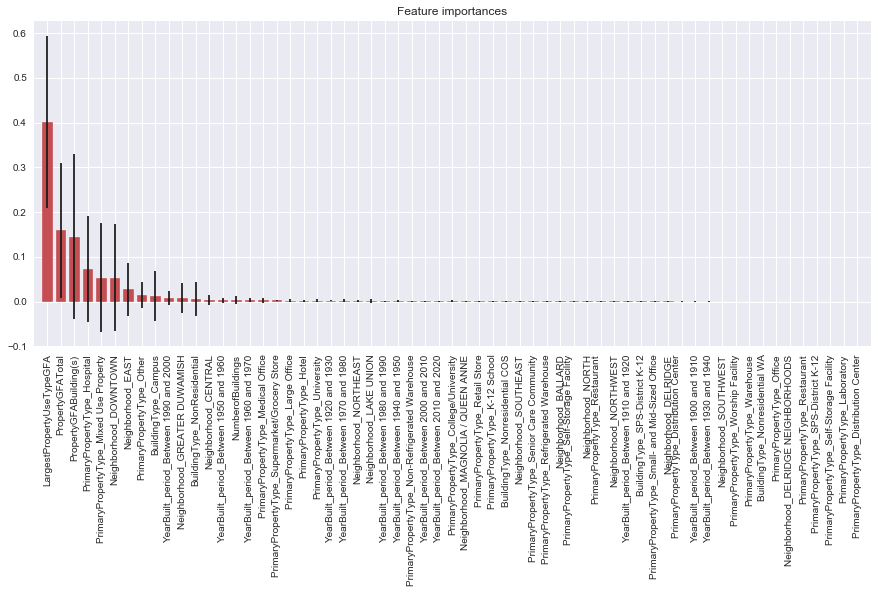


 {'ccp_alpha': 0.001, 'criterion': 'mae', 'max_depth': 9, 'n_estimators': 50}

RMSE of RandomForestRegressor with GridSearchCV (training set): 6.66 e6

RMSE of RandomForestRegressor with GridSearchCV (test set): 36.98 e6 time 41.25s

RMSE of RandomForestRegressor with GridSearchCV (test set) normalized: 0.04
R2 score of RandomForestRegressor with GridSearchCV: 0.33


In [41]:
# RandomForestRegressor

# n_estimators': 100
start_time = timeit.default_timer()
rfRegr = RandomForestRegressor(random_state=0).fit(X_train_std, y_train)

print("Random forest regressor params: \n", rfRegr.get_params())

y_pred = rfRegr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of RandomForestRegressor (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, rfRegr.predict(X_train_std)))/1e6))
print("\nRMSE of RandomForestRegressor (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of RandomForestRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of RandomForestRegressor: {:.2f}".format(rfRegr.score(X_test_std, y_test)))
perfDictEnergy.update( {'RandomForestRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), rfRegr.score(X_test_std, y_test), elapsed]} )


select = SelectFromModel(rfRegr, prefit=True)
print(select.get_params())
X_train_red = select.transform(X_train_std)
X_test_red = select.transform(X_test_std)

print(X_train_std.shape)
print(X_train_red.shape)
print(X_test_std.shape)
print(X_test_red.shape)

# Show features importances
importances = rfRegr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfRegr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print and plot the feature ranking
columnsNames = dummyDf_na.loc[:, dummyDf_na.columns != 'SiteEnergyUse(kBtu)'].columns
print("Feature ranking:")

for f in range(X_train_std.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], columnsNames[indices[f]] , importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
# plt.figure()
fig = plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(X_train_std.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_std.shape[1]), columnsNames[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.show()

# Cross validation
# 'n_estimators': range(50, 200, 5),
# ccp_alpha: non-negative float, default=0.0: Complexity parameter used for Minimal Cost-Complexity Pruning
# Greater values of ccp_alpha increase the number of nodes pruned
param_grid = {'n_estimators': range(50, 100, 50),
              'max_depth' : range(1, 11, 4),
              'criterion': ['mse', 'mae'],
              'ccp_alpha': np.logspace(-3, 3, 3)
             }

grid_pred = model_selection.GridSearchCV(rfRegr, param_grid, cv=3)

start_time = timeit.default_timer()                                                                                                    
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of RandomForestRegressor with GridSearchCV (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))/1e6))
print("\nRMSE of RandomForestRegressor with GridSearchCV (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of RandomForestRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of RandomForestRegressor with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDictEnergy.update( {'RandomForestRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )

In [42]:
# AdaBoostRegressor

#n_estimators=50
start_time = timeit.default_timer()
abr = AdaBoostRegressor(random_state=0).fit(X_train_std, y_train)

print("Adaboost regressor params: \n", abr.get_params())

y_pred = abr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of AdaBoostRegressor (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, abr.predict(X_train_std)))/1e6))
print("\nRMSE of AdaBoostRegressor (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of AdaBoostRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of AdaBoostRegressor: {:.2f}".format(abr.score(X_test_std, y_test)))
perfDictEnergy.update( {'AdaBoostRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), abr.score(X_test_std, y_test), elapsed]} )


# Cross validation
param_grid = {'n_estimators': range(50, 300, 50),
              'learning_rate': np.logspace(-2, 2, 10),
              'loss': ['linear', 'square', 'exponential']
             }
grid_pred = model_selection.GridSearchCV(abr, param_grid, cv=5)

start_time = timeit.default_timer()
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of AdaBoostRegressor with GridSearchCV (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))/1e6))
print("\nRMSE of AdaBoostRegressor with GridSearchCV (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of AdaBoostRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of AdaBoostRegressor  with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDictEnergy.update( {'AdaBoostRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )


Adaboost regressor params: 
 {'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': 0}

RMSE of AdaBoostRegressor (training set): 13.21 e6

RMSE of AdaBoostRegressor (test set): 40.74 e6 time 0.15s

RMSE of AdaBoostRegressor (test set) normalized: 0.05
R2 score of AdaBoostRegressor: 0.18

 {'learning_rate': 0.21544346900318834, 'loss': 'exponential', 'n_estimators': 50}

RMSE of AdaBoostRegressor with GridSearchCV (training set): 7.57 e6

RMSE of AdaBoostRegressor with GridSearchCV (test set): 39.10 e6 time 174.61s

RMSE of AdaBoostRegressor with GridSearchCV (test set) normalized: 0.04
R2 score of AdaBoostRegressor  with GridSearchCV: 0.25


In [43]:
# GradientBoostingRegressor

start_time = timeit.default_timer()
gbr = GradientBoostingRegressor(random_state=0).fit(X_train_std, y_train)
print("Gradient boosting regressor params: \n", gbr.get_params())

y_pred = gbr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, gbr.predict(X_train_std)))/1e6))
print("\nRMSE of GradientBoostingRegressor (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of GradientBoostingRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of GradientBoostingRegressor: {:.2f}".format(gbr.score(X_test_std, y_test)))
perfDictEnergy.update( {'GradientBoostingRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), gbr.score(X_test_std, y_test), elapsed]} )


# Cross validation
# loss: ['ls', 'lad', 'huber', 'quantile']
# use alpha if 'huber' or 'quantile'
# 'criterion': ['friedman_mse', 'mse', 'mae']
# 'max_depth': range(1, 10, 2)
#  'learning_rate': np.logspace(-1, 1, 5)
# 'n_estimators': range(50, 300, 50)
param_grid = {'criterion': ['friedman_mse', 'mse', 'mae'],
              'max_depth': range(1, 10, 2),
              'n_estimators': range(50, 150, 50)
             }
grid_pred = model_selection.GridSearchCV(gbr, param_grid, cv=5)

start_time = timeit.default_timer()              
grid_pred.fit(X_train_std, y_train)
print("\n", grid_pred.best_params_)

y_pred = grid_pred.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, grid_pred.predict(X_train_std)))/1e6))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of GradientBoostingRegressor with GridSearchCV (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of GradientBoostingRegressor with GridSearchCV: {:.2f}".format(r2_score(y_test, y_pred)))
perfDictEnergy.update( {'GradientBoostingRegressor-GridSearchCV':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), elapsed]} )


Gradient boosting regressor params: 
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

RMSE of GradientBoostingRegressor (training set): 4.46 e6

RMSE of GradientBoostingRegressor (test set): 34.81 e6 time 0.21s

RMSE of GradientBoostingRegressor (test set) normalized: 0.04
R2 score of GradientBoostingRegressor: 0.40

 {'criterion': 'mae', 'max_depth': 5, 'n_estimators': 100}

RMSE of GradientBoostingRegressor with GridSearchCV (training set): 3.44 e6

RMSE of GradientBoostingRegressor with GridSearchCV (test set): 37.84 e6 time 330.14s

RMSE 

In [44]:
# Training classifiers of voting regressor
reg1 = MLPRegressor(random_state=0, tol=1e-2, max_iter=1000, learning_rate_init=10)
reg2 = BaggingRegressor(random_state=0, n_estimators=24)
reg3 = linear_model.LinearRegression()
reg4 = RandomForestRegressor(random_state=0)
reg5 = GradientBoostingRegressor(random_state=0)
reg6 = SVR(C=10000, gamma=0.01)
reg7 = LinearSVR(random_state=0, tol=1e-5, dual=False, loss='squared_epsilon_insensitive')


start_time = timeit.default_timer()
votr = VotingRegressor(estimators=[('mplr', reg1), ('bgr', reg2), ('lr', reg3), ('rfr', reg4),
                                   ('gbr', reg5), ('svr', reg6), ('lsvr', reg7)]).fit(X_train_std, y_train)

y_pred = votr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of VotingRegressor (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, votr.predict(X_train_std)))/1e6))
print("\nRMSE of VotingRegressor (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of VotingRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of VotingRegressor: {:.2f}".format(votr.score(X_test_std, y_test)))
perfDictEnergy.update( {'VotingRegressor':[np.sqrt( metrics.mean_squared_error(y_test, y_pred)), votr.score(X_test_std, y_test), elapsed]} )



RMSE of VotingRegressor (training set): 8.47 e6

RMSE of VotingRegressor (test set): 18.70 e6 time 2.81s

RMSE of VotingRegressor (test set) normalized: 0.02
R2 score of VotingRegressor: 0.83


Mean dummy model:
RMSE: 4.5e+07
R2: -0.00
Elapsed time: 0.00


Linear reg:
RMSE: 1.7e+07
R2: 0.85
Elapsed time: 0.00


LinearReg-GridSearchCV:
RMSE: 1.7e+07
R2: 0.85
Elapsed time: 0.17


RidgeCV:
RMSE: 1.8e+07
R2: 0.84
Elapsed time: 0.08


LassoCV:
RMSE: 1.7e+07
R2: 0.85
Elapsed time: 0.16


ElasticNetCV:
RMSE: 1.8e+07
R2: 0.85
Elapsed time: 0.13


Linear SVR:
RMSE: 1.7e+07
R2: 0.85
Elapsed time: 0.01


Linear SVR-GridSearchCV:
RMSE: 2.1e+07
R2: 0.78
Elapsed time: 1.72


SVR:
RMSE: 4.6e+07
R2: -0.03
Elapsed time: 0.15


SVR-GridSearchCV:
RMSE: 4.4e+07
R2: 0.03
Elapsed time: 15.38


Kernel Ridge:
RMSE: 4.3e+07
R2: 0.07
Elapsed time: 0.07


Kernel Ridge-GridSearchCV:
RMSE: 4.3e+07
R2: 0.10
Elapsed time: 4.96


MLPRegressor:
RMSE: 7e+07
R2: -1.44
Elapsed time: 1.72


MLPRegressor-GridSearchCV:
RMSE: 8.3e+07
R2: -2.40
Elapsed time: 43.93


BaggingRegressor:
RMSE: 3.7e+07
R2: 0.32
Elapsed time: 0.13


BaggingRegressor-GridSearchCV:
RMSE: 3.5e+07
R2: 0.39
Elapsed time: 72.28


RandomForestRe

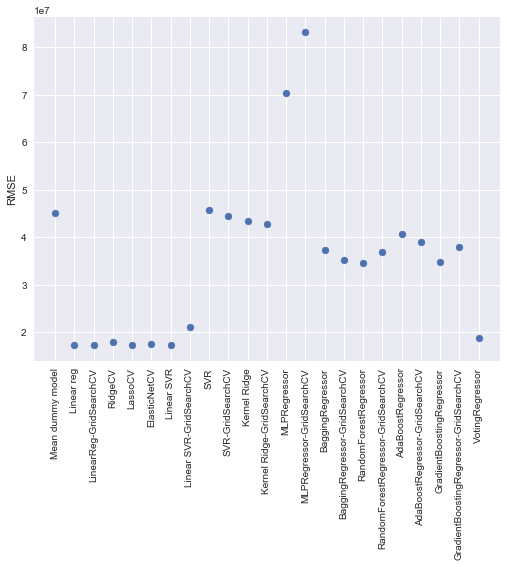

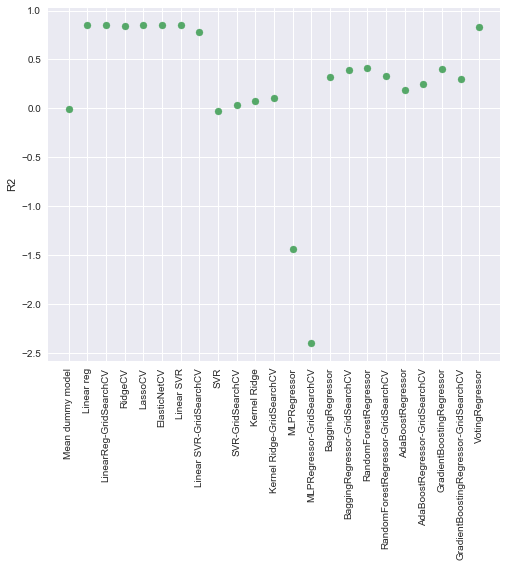

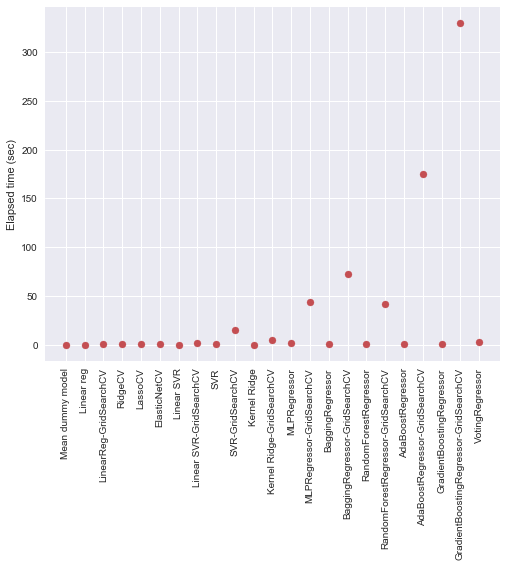

In [45]:
# Print and plot different tested models performances
for key, values in perfDictEnergy.items():
    print(key + ':')
    print('RMSE: {:.2g}'.format(values[0]))
    print('R2: {:.2f}'.format(values[1]))
    print('Elapsed time: {:.2f}'.format(values[2]))
    print('\n')


plt.scatter(list(perfDictEnergy.keys()), [item[0] for item in list(perfDictEnergy.values())])
plt.ylabel('RMSE')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

plt.scatter(list(perfDictEnergy.keys()), [item[1] for item in list(perfDictEnergy.values())], color='g')
plt.ylabel('R2')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

plt.scatter(list(perfDictEnergy.keys()), [item[2] for item in list(perfDictEnergy.values())], color='r')
plt.ylabel('Elapsed time (sec)')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

### Perform PCA

,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofBuildings,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,1.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


(1674, 61)
LargestPropertyUseTypeGFA
3.942652329749104
(1608, 61)
[0.07478539 0.04945344 0.03757004 0.03168645 0.02972583 0.0280592
 0.0262376  0.02425509 0.02392476 0.02347055 0.0228666  0.0224615
 0.02204453 0.02145788 0.02131465 0.02116501 0.02077599 0.02034042
 0.01990375 0.01961417 0.01949953 0.01910873 0.01909812 0.01846846
 0.01835253 0.01816578 0.01806845 0.01797217 0.01763518 0.01750911
 0.01713315 0.01704201 0.0165798  0.0164413  0.01639865 0.01627055
 0.01603548 0.01560522 0.01483463 0.01465923 0.01372736 0.01308899
 0.01287009 0.01237316 0.01128511 0.00913057 0.00764084 0.0065196
 0.00380949 0.00315048 0.00029038 0.00012303]
0.9999999999999999
[0.07478539 0.12423882 0.16180886 0.19349531 0.22322114 0.25128035
 0.27751795 0.30177304 0.3256978  0.34916835 0.37203495 0.39449645
 0.41654098 0.43799886 0.45931351 0.48047851 0.5012545  0.52159492
 0.54149867 0.56111284 0.58061237 0.59972111 0.61881922 0.63728768
 0.65564022 0.67380599 0.69187444 0.70984661 0.72748179 0.7449909
 0

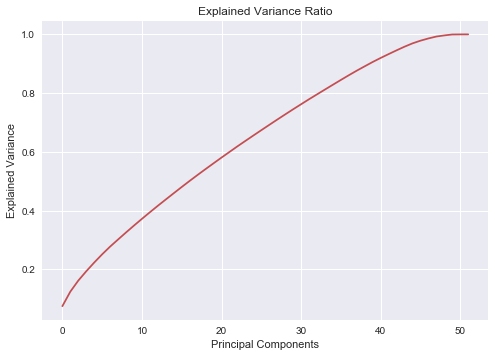

(-1, 1)

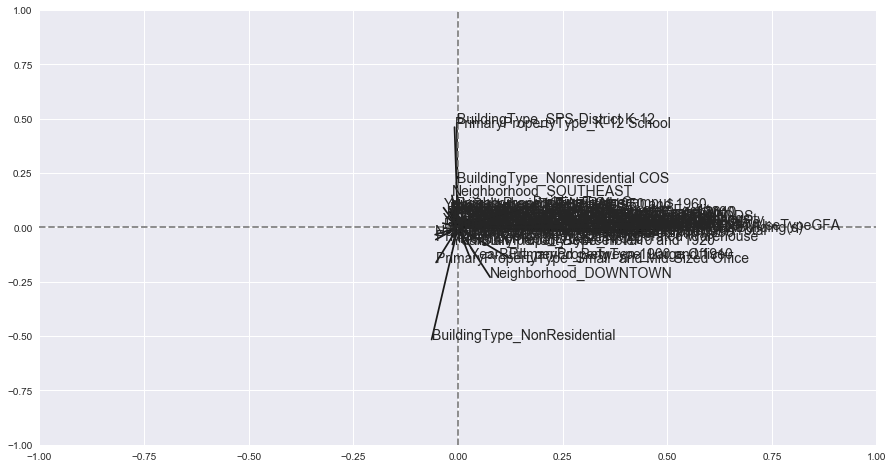

In [46]:
simplifiedDf_dum = nonResDataWtOut[['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood',
                            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'NumberofBuildings']]
dummyDf = pd.get_dummies(simplifiedDf_dum, columns=['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood'])
display(dummyDf.head())
print(dummyDf.shape)
for col in dummyDf.columns:
    if dummyDf[col].isnull().mean()*100 > 3:
        print(col)
        print(dummyDf[col].isnull().mean()*100)
dummyDf_na = dummyDf.dropna(how='any')
print(dummyDf_na.shape)

X = dummyDf_na.values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components=52) # 52
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


cumulative = np.cumsum(pca.explained_variance_ratio_)
print(cumulative)

plt.plot(range(0,52), cumulative, 'r')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

pcs = pca.components_

fig = plt.figure(figsize=(15,8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, dummyDf_na.columns[i], fontsize='14')

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlim([-1, 1])
plt.ylim([-1, 1])

### Apply PCA

In [47]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_pca.shape)
print(X_test_pca.shape)


lr = linear_model.LinearRegression()
start_time = timeit.default_timer()
lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)
elapsed = timeit.default_timer() - start_time
print("RMSE of linear regression model (training set): {:.2f} e6"
      .format(np.sqrt( metrics.mean_squared_error(y_train, lr.predict(X_train_pca)) )/1e6))
print("RMSE of linear regression model (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )/1e6, elapsed))
print("RMSE of linear regression model (test set) normalized: {:.2f}"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )/y_range_energy))
print("R2 score of linear regression model : {:.2f}".format(lr.score(X_test_pca, y_test)))

(1120, 52)
(481, 52)
RMSE of linear regression model (training set): 13.65 e6
RMSE of linear regression model (test set): 17.30 e6 time 0.00s
RMSE of linear regression model (test set) normalized: 0.02
R2 score of linear regression model : 0.85


In [48]:
# Training classifiers of voting regressor
reg1 = MLPRegressor(random_state=0, tol=1e-2, max_iter=1000, learning_rate_init=10)
reg2 = BaggingRegressor(random_state=0, n_estimators=24)
reg3 = linear_model.LinearRegression()
reg4 = RandomForestRegressor(random_state=0)
reg5 = GradientBoostingRegressor(random_state=0)
reg6 = SVR(C=10000, gamma=0.01)
reg7 = LinearSVR(random_state=0, tol=1e-5, dual=False, loss='squared_epsilon_insensitive')


start_time = timeit.default_timer()
votr = VotingRegressor(estimators=[('mplr', reg1), ('bgr', reg2), ('lr', reg3), ('rfr', reg4),
                                   ('gbr', reg5), ('svr', reg6), ('lsvr', reg7)]).fit(X_train_pca, y_train)

y_pred = votr.predict(X_test_pca)
elapsed = timeit.default_timer() - start_time
print("\nRMSE of VotingRegressor (training set): {:.2f} e6"
      .format(np.sqrt(metrics.mean_squared_error(y_train, votr.predict(X_train_pca)))/1e6))
print("\nRMSE of VotingRegressor (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1e6, elapsed))
print("\nRMSE of VotingRegressor (test set) normalized: {:.2f}"
      .format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_range_energy))
print("R2 score of VotingRegressor: {:.2f}".format(votr.score(X_test_pca, y_test)))



RMSE of VotingRegressor (training set): 8.46 e6

RMSE of VotingRegressor (test set): 22.85 e6 time 7.14s

RMSE of VotingRegressor (test set) normalized: 0.03
R2 score of VotingRegressor: 0.74


### Use GHGEmissions(MetricTonsCO2e) in SiteEnergyUse(kBtu) prediction

In [49]:
simplifiedDf_dum = nonResDataWtOut[['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood',
                            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'NumberofBuildings',
                            'GHGEmissions(MetricTonsCO2e)',
                            'SiteEnergyUse(kBtu)']]
dummyDf = pd.get_dummies(simplifiedDf_dum, columns=['PrimaryPropertyType', 'BuildingType', 'YearBuilt_period', 'Neighborhood'])


print(dummyDf.shape)
for col in dummyDf.columns:
    if dummyDf[col].isnull().mean()*100 > 3:
        print(col)
        print(dummyDf[col].isnull().mean()*100)
dummyDf_na = dummyDf.dropna(how='any')
print(dummyDf_na.shape)
display(dummyDf_na.head())

display(dummyDf_na.loc[:, dummyDf_na.columns != 'SiteEnergyUse(kBtu)'].head())

X = dummyDf_na.loc[:, dummyDf_na.columns != 'SiteEnergyUse(kBtu)'].values
y = dummyDf_na['SiteEnergyUse(kBtu)'].values

print("y min and max values: ", y.min(), y.max())
y_range_energy = y.max()-y.min()
print("Range of y values: ", y_range_energy)
print("X min and max values: ", X.min(), X.max())

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                test_size=0.3, random_state=0)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

print("X_train_std min and max values: ", X_train_std.min(), X_train_std.max())
print("X_test_std min and max values: ", X_test_std.min(), X_test_std.max())


lr = linear_model.LinearRegression()
start_time = timeit.default_timer()
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
elapsed = timeit.default_timer() - start_time
print("RMSE of linear regression model (training set): {:.2f} e6"
      .format(np.sqrt( metrics.mean_squared_error(y_train, lr.predict(X_train_std)) )/1e6))
print("RMSE of linear regression model (test set): {:.2f} e6 time {:.2f}s"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )/1e6, elapsed))
print("RMSE of linear regression model (test set) normalized: {:.2f}"
      .format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )/y_range_energy))
print("R2 score of linear regression model : {:.2f}".format(lr.score(X_test_std, y_test)))

(1674, 63)
LargestPropertyUseTypeGFA
3.942652329749104
(1601, 63)


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofBuildings,GHGEmissions(MetricTonsCO2e),SiteEnergyUse(kBtu),PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,1.0,249.43,6981428.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,1.0,263.51,8354235.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,1.0,2061.48,73130656.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1.0,1936.34,28229320.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,1.0,507.70,14829099.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofBuildings,GHGEmissions(MetricTonsCO2e),PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,88434,88434.0,1.0,249.43,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,103566,88502,83880.0,1.0,263.51,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,961990,961990,757243.0,1.0,2061.48,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,61320,61320,61320.0,1.0,1936.34,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,119890,107430,123445.0,1.0,507.70,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


y min and max values:  0.0 873923712.0
Range of y values:  873923712.0
X min and max values:  -50550.0 9320156.0
X_train_std min and max values:  -2.582872988885145 33.45145736735538
X_test_std min and max values:  -2.582872988885145 164.9908907147771
RMSE of linear regression model (training set): 4.25 e6
RMSE of linear regression model (test set): 15.94 e6 time 0.00s
RMSE of linear regression model (test set) normalized: 0.02
R2 score of linear regression model : 0.88
